In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import textwrap
import folium
import warnings
import requests
import json
import geopandas
import branca.colormap as cmp
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
sns.set_theme(style="whitegrid")
sns.set_color_codes("pastel")

# Initial exploration of data

In [3]:
mhc_data = pd.read_csv('Mental_Health_Care_in_the_Last_4_Weeks.csv')
mhc_data.shape

(10404, 15)

In [4]:

mhc_data.sort_values('Time Period').head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval,Quartile Range,Suppression Flag
3061,"Received Counseling or Therapy, Last 4 Weeks",By Age,United States,40 - 49 years,-1,1,"Jul 6 - Jul 20, 2021",7/6/2021,7/20/2021,NaN,NaN,NaN,NaN,NaN,NaN
8288,Took Prescription Medication for Mental Health...,By Presence of Symptoms of Anxiety/Depression,United States,Experienced symptoms of anxiety/depression in ...,-1,1,"Oct 12 - Nov 30, 2021",10/12/2021,11/30/2021,NaN,NaN,NaN,NaN,NaN,NaN
8289,Took Prescription Medication for Mental Health...,By Race/Hispanic ethnicity,United States,Hispanic or Latino,-1,1,"Oct 12 - Nov 30, 2021",10/12/2021,11/30/2021,NaN,NaN,NaN,NaN,NaN,NaN
8290,Took Prescription Medication for Mental Health...,By Race/Hispanic ethnicity,United States,"Non-Hispanic White, single race",-1,1,"Oct 12 - Nov 30, 2021",10/12/2021,11/30/2021,NaN,NaN,NaN,NaN,NaN,NaN
8291,Took Prescription Medication for Mental Health...,By Race/Hispanic ethnicity,United States,"Non-Hispanic Black, single race",-1,1,"Oct 12 - Nov 30, 2021",10/12/2021,11/30/2021,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
mhc_data.dtypes

Indicator                  object
Group                      object
State                      object
Subgroup                   object
Phase                      object
Time Period                 int64
Time Period Label          object
Time Period Start Date     object
Time Period End Date       object
Value                     float64
LowCI                     float64
HighCI                    float64
Confidence Interval        object
Quartile Range             object
Suppression Flag          float64
dtype: object

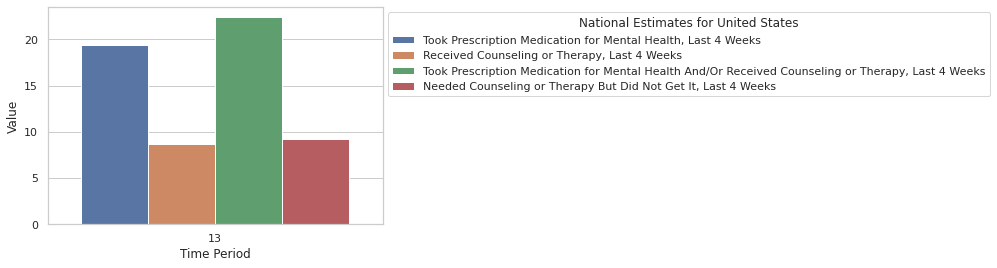

In [6]:
temp = mhc_data[mhc_data['Group'] == 'National Estimate']
temp = temp[temp['Time Period'] == 13]
temp_g = temp.drop(['LowCI', 'HighCI', 'Quartile Range', 'Suppression Flag'], axis =1)
ax = sns.barplot(data = temp_g, x = 'Time Period', y = 'Value', hue = 'Indicator')
ax.legend(loc=0,title = "National Estimates for United States")
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1,1))

In [10]:
eth_table = mhc_data[mhc_data['Group'] == 'By Race/Hispanic ethnicity']
eth_table = eth_table[eth_table['Time Period'] ==13]
eth_table = eth_table.drop(['LowCI',"HighCI", 'Confidence Interval', 'Quartile Range', 'Suppression Flag'], axis =1)
helplz = eth_table[eth_table.Indicator == 'Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks']
h1 = helplz.drop(['Phase', 'Time Period Start Date', 'Time Period End Date', 'State', 'Indicator','Time Period', 'Group', 'Time Period Label'], axis =1)

h2 = h1.set_index('Subgroup')
h2 = h2.Value.rename('2020',inplace = True)
h2

Subgroup
Hispanic or Latino                               9.6
Non-Hispanic White, single race                  9.1
Non-Hispanic Black, single race                  9.3
Non-Hispanic Asian, single race                  4.8
Non-Hispanic, other races and multiple races    14.2
Name: 2020, dtype: float64

In [11]:
eth_table = mhc_data[mhc_data['Group'] == 'By Race/Hispanic ethnicity']
eth_table = eth_table[eth_table['Time Period'] ==42]
eth_table = eth_table.drop(['LowCI',"HighCI", 'Confidence Interval', 'Quartile Range', 'Suppression Flag'], axis =1)
helplz = eth_table[eth_table.Indicator == 'Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks']
h1 = helplz.drop(['Phase', 'Time Period Start Date', 'Time Period End Date', 'State', 'Indicator','Time Period', 'Group', 'Time Period Label'], axis =1)
h3 = h1.set_index('Subgroup')
h3 = h3.Value.rename('2022', inplace = True)

In [12]:
h4 = pd.merge(h2,h3, right_index = True, left_index = True)

In [13]:
h4

,2020,2022
Subgroup,,
Hispanic or Latino,9.6,12.9
"Non-Hispanic White, single race",9.1,10.9
"Non-Hispanic Black, single race",9.3,10.7
"Non-Hispanic Asian, single race",4.8,5.6
"Non-Hispanic, other races and multiple races",14.2,16.5


In [14]:
h4['%_Diff'] = h4['2022'] -h4['2020']
h4

,2020,2022,%_Diff
Subgroup,,,
Hispanic or Latino,9.6,12.9,3.3
"Non-Hispanic White, single race",9.1,10.9,1.8
"Non-Hispanic Black, single race",9.3,10.7,1.4
"Non-Hispanic Asian, single race",4.8,5.6,0.8
"Non-Hispanic, other races and multiple races",14.2,16.5,2.3


# National Summary 

## Cleaning and validating data

In [15]:
mhc_data.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval,Quartile Range,Suppression Flag
0,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,2,13,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,19.4,19.0,19.8,19.0 - 19.8,NaN,NaN
1,Took Prescription Medication for Mental Health...,By Age,United States,18 - 29 years,2,13,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,18.7,17.2,20.3,17.2 - 20.3,NaN,NaN
2,Took Prescription Medication for Mental Health...,By Age,United States,30 - 39 years,2,13,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,18.3,17.3,19.2,17.3 - 19.2,NaN,NaN
3,Took Prescription Medication for Mental Health...,By Age,United States,40 - 49 years,2,13,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,20.4,19.5,21.3,19.5 - 21.3,NaN,NaN
4,Took Prescription Medication for Mental Health...,By Age,United States,50 - 59 years,2,13,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,21.2,20.2,22.2,20.2 - 22.2,NaN,NaN


In [16]:
mhc_data.columns

Index(['Indicator', 'Group', 'State', 'Subgroup', 'Phase', 'Time Period',
       'Time Period Label', 'Time Period Start Date', 'Time Period End Date',
       'Value', 'LowCI', 'HighCI', 'Confidence Interval', 'Quartile Range',
       'Suppression Flag'],
      dtype='object')

In [17]:
mhc_data['Indicator'].unique()

array(['Took Prescription Medication for Mental Health, Last 4 Weeks',
       'Received Counseling or Therapy, Last 4 Weeks',
       'Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks',
       'Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks'],
      dtype=object)

In [18]:
mhc_data['Group'].unique()

array(['National Estimate', 'By Age', 'By Sex',
       'By Presence of Symptoms of Anxiety/Depression',
       'By Race/Hispanic ethnicity', 'By Education', 'By State',
       'By Disability status', 'By Sexual orientation',
       'By Gender identity'], dtype=object)

In [19]:
mhc_data_national_agg = mhc_data.loc[mhc_data['Group']=='National Estimate']

# Filter down to just National Level Agg

In [20]:
mhc_data_national_agg.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval,Quartile Range,Suppression Flag
0,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,2,13,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,19.4,19.0,19.8,19.0 - 19.8,NaN,NaN
72,"Received Counseling or Therapy, Last 4 Weeks",National Estimate,United States,United States,2,13,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,8.7,8.3,9.2,8.3 - 9.2,NaN,NaN
144,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,2,13,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,22.4,22.0,22.9,22.0 - 22.9,NaN,NaN
216,Needed Counseling or Therapy But Did Not Get I...,National Estimate,United States,United States,2,13,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,9.2,8.8,9.6,8.8 - 9.6,NaN,NaN
288,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,2,14,"Sep 2 - Sep 14, 2020",9/2/2020,9/14/2020,19.6,19.1,20.2,19.1 - 20.2,NaN,NaN


In [21]:
mhc_data_national_agg['Indicator'].unique()

array(['Took Prescription Medication for Mental Health, Last 4 Weeks',
       'Received Counseling or Therapy, Last 4 Weeks',
       'Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks',
       'Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks'],
      dtype=object)

In [22]:
mhc_data_national_took_meds = mhc_data_national_agg.loc[mhc_data_national_agg['Indicator']== 'Took Prescription Medication for Mental Health, Last 4 Weeks']

mhc_data_national_received_help =  mhc_data_national_agg.loc[mhc_data_national_agg['Indicator']== 'Received Counseling or Therapy, Last 4 Weeks']

mhc_data_national_both_cares_received =  mhc_data_national_agg.loc[mhc_data_national_agg['Indicator']== 'Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks']

mhc_data_national_did_not_get_care =  mhc_data_national_agg.loc[mhc_data_national_agg['Indicator']== 'Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks']



In [23]:
print(mhc_data_national_took_meds.shape)

print(mhc_data_national_received_help.shape)

print(mhc_data_national_both_cares_received.shape)

print(mhc_data_national_did_not_get_care.shape)

(38, 15)
(38, 15)
(38, 15)
(38, 15)


In [24]:
mhc_data_national_took_meds.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval,Quartile Range,Suppression Flag
0,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,2,13,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,19.4,19.0,19.8,19.0 - 19.8,NaN,NaN
288,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,2,14,"Sep 2 - Sep 14, 2020",9/2/2020,9/14/2020,19.6,19.1,20.2,19.1 - 20.2,NaN,NaN
576,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,2,15,"Sep 16 - Sep 28, 2020",9/16/2020,9/28/2020,19.8,19.3,20.3,19.3 - 20.3,NaN,NaN
864,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,2,16,"Sep 30 - Oct 12, 2020",9/30/2020,10/12/2020,19.5,19.0,20.0,19.0 - 20.0,NaN,NaN
1153,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,2,17,"Oct 14 - Oct 26, 2020",10/14/2020,10/26/2020,20.2,19.7,20.8,19.7 - 20.8,NaN,NaN


In [25]:
mhc_data_national_took_meds['Time Period Start Date'].unique()

array(['8/19/2020', '9/2/2020', '9/16/2020', '9/30/2020', '10/14/2020',
       '10/28/2020', '11/11/2020', '11/25/2020', '12/9/2020',
       '12/22/2020', '1/6/2021', '1/20/2021', '2/3/2021', '2/17/2021',
       '3/30/2021', '3/3/2021', '3/17/2021', '4/14/2021', '4/28/2021',
       '5/12/2021', '5/26/2021', '6/9/2021', '6/23/2021', '7/6/2021',
       '7/21/2021', '8/4/2021', '8/18/2021', '9/1/2021', '9/15/2021',
       '9/29/2021', '10/12/2021', '12/1/2021', '12/29/2021', '1/26/2022',
       '2/23/2022', '3/2/2022', '3/30/2022', '4/27/2022'], dtype=object)

## Charts:

1) Line chart, hued by Indicator. Three years before covid -> ref line for covid start, 3 years of covid
1) Zooming in on each receiving care
1) Zooming in on not receiving care

Note: will later compare state averages to the national average as reference

In [26]:
# Barplot that shows average for each indicator, maybe diff colored bars per year as a follow up!

In [27]:
mhc_data_national_agg.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval,Quartile Range,Suppression Flag
0,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,2,13,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,19.4,19.0,19.8,19.0 - 19.8,NaN,NaN
72,"Received Counseling or Therapy, Last 4 Weeks",National Estimate,United States,United States,2,13,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,8.7,8.3,9.2,8.3 - 9.2,NaN,NaN
144,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,2,13,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,22.4,22.0,22.9,22.0 - 22.9,NaN,NaN
216,Needed Counseling or Therapy But Did Not Get I...,National Estimate,United States,United States,2,13,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,9.2,8.8,9.6,8.8 - 9.6,NaN,NaN
288,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,2,14,"Sep 2 - Sep 14, 2020",9/2/2020,9/14/2020,19.6,19.1,20.2,19.1 - 20.2,NaN,NaN


In [28]:
mhc_data_national_agg.columns

Index(['Indicator', 'Group', 'State', 'Subgroup', 'Phase', 'Time Period',
       'Time Period Label', 'Time Period Start Date', 'Time Period End Date',
       'Value', 'LowCI', 'HighCI', 'Confidence Interval', 'Quartile Range',
       'Suppression Flag'],
      dtype='object')

In [29]:
mhc_data_national_agg['Indicator'].value_counts()

Took Prescription Medication for Mental Health, Last 4 Weeks                                          38
Received Counseling or Therapy, Last 4 Weeks                                                          38
Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks    38
Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks                                         38
Name: Indicator, dtype: int64

In [30]:
indicators_mean_all_time = pd.DataFrame(mhc_data_national_agg.groupby(['Indicator'])['Value'].mean().sort_values(ascending = False)).reset_index()


In [31]:
indicators_mean_all_time

,Indicator,Value
0,Took Prescription Medication for Mental Health...,24.836364
1,Took Prescription Medication for Mental Health...,21.360606
2,Needed Counseling or Therapy But Did Not Get I...,10.921212
3,"Received Counseling or Therapy, Last 4 Weeks",10.118182


## 1) Barplot - A) Overall Avg per Indicator (all-time)

In [32]:
mhc_data_national_agg['date'] = pd.to_datetime(mhc_data_national_agg['Time Period Start Date'])

In [33]:
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

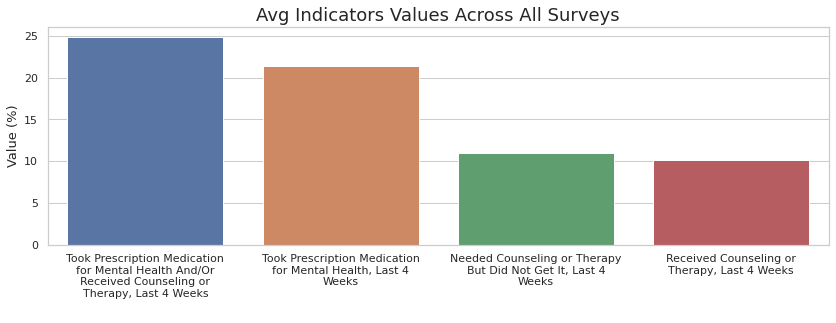

In [34]:
fig, ax = plt.subplots(figsize = ( 14, 4 ))

barplot_data = mhc_data_national_agg.groupby(['Indicator'])['Value'].mean().sort_values(ascending = False).reset_index()
#barplot_data = merged_contrib_aggs[['cand_nm','sum_contbs','avg_contb_amt']].melt('cand_nm', var_name='metric', value_name='amount')

graph = sns.barplot(data = barplot_data[['Indicator','Value']]
             , ax = ax
             , x = 'Indicator'
             , y = 'Value'
             #, hue = 'metric'
             , order = barplot_data.sort_values('Value', ascending = False).Indicator
            )

ax.tick_params(axis='x', rotation=90)

# Set label for x-axis
ax.set_xlabel( " " , size = 13 )
  
# Set label for y-axis
ax.set_ylabel( "Value (%)" , size = 13 )
  
# Set title for plot
ax.set_title( "Avg Indicators Values Across All Surveys" , size = 18 )

wrap_labels(ax, 30)

## 1) Barplot - B) Avg per Indicator (by Year)


In [35]:
mhc_data_national_agg['Year'] = pd.DatetimeIndex(mhc_data_national_agg['date']).year

In [36]:
mhc_data_national_agg.Year.value_counts()

2021    92
2020    40
2022    20
Name: Year, dtype: int64

In [37]:
mhc_data_national_agg.groupby(['Indicator','Year']).agg({'Value':['mean','count']}).reset_index()


Indicator  Year      Value      
                                                                  mean count
0   Needed Counseling or Therapy But Did Not Get I...  2020  10.700000     9
1   Needed Counseling or Therapy But Did Not Get I...  2021  10.925000    20
2   Needed Counseling or Therapy But Did Not Get I...  2022  11.400000     4
3        Received Counseling or Therapy, Last 4 Weeks  2020   9.533333     9
4        Received Counseling or Therapy, Last 4 Weeks  2021  10.205000    20
5        Received Counseling or Therapy, Last 4 Weeks  2022  11.000000     4
6   Took Prescription Medication for Mental Health...  2020  23.755556     9
7   Took Prescription Medication for Mental Health...  2021  25.005000    20
8   Took Prescription Medication for Mental Health...  2022  26.425000     4
9   Took Prescription Medication for Mental Health...  2020  20.455556     9
10  Took Prescription Medication for Mental Health...  2021  21.495000    20
11  Took Prescription Medication for Mental Health...  2022  22.725000     4

In [38]:
barplot_data = mhc_data_national_agg.groupby(['Indicator','Year']).agg({'Value':['mean','count']})
barplot_data.columns = ['value_mean','value_count']
barplot_data = barplot_data.reset_index()


In [39]:
barplot_data['Indicator'].value_counts()

Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks                                         3
Received Counseling or Therapy, Last 4 Weeks                                                          3
Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks    3
Took Prescription Medication for Mental Health, Last 4 Weeks                                          3
Name: Indicator, dtype: int64

In [40]:
barplot_data.columns

Index(['Indicator', 'Year', 'value_mean', 'value_count'], dtype='object')

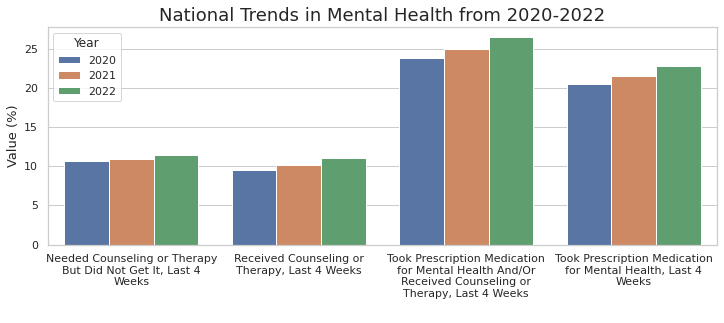

In [41]:
fig, ax = plt.subplots(figsize = ( 12, 4 ))

# grouped by indicator and year
barplot_data = mhc_data_national_agg.groupby(['Indicator','Year']).agg({'Value':['mean','count']})
barplot_data.columns = ['value_mean','value_count']
barplot_data = barplot_data.reset_index()

graph = sns.barplot(data = barplot_data
             , ax = ax
             , x = 'Indicator'
             , y = 'value_mean'
             , hue = 'Year'
            # , order = barplot_data.sort_values('value_mean', ascending = False).Indicator
            )

ax.tick_params(axis='x', rotation=90)

# Set label for x-axis
ax.set_xlabel( " " , size = 13 )
  
# Set label for y-axis
ax.set_ylabel( "Value (%)" , size = 13 )
  
# Set title for plot
ax.set_title( "National Trends in Mental Health from 2020-2022" , size = 18 )

wrap_labels(ax, 30)

# Indicator R  Line Charts -> Time series analysis :)

In [42]:
mhc_data_national_agg.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval,Quartile Range,Suppression Flag,date,Year
0,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,2,13,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,19.4,19.0,19.8,19.0 - 19.8,NaN,NaN,2020-08-19,2020
72,"Received Counseling or Therapy, Last 4 Weeks",National Estimate,United States,United States,2,13,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,8.7,8.3,9.2,8.3 - 9.2,NaN,NaN,2020-08-19,2020
144,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,2,13,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,22.4,22.0,22.9,22.0 - 22.9,NaN,NaN,2020-08-19,2020
216,Needed Counseling or Therapy But Did Not Get I...,National Estimate,United States,United States,2,13,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,9.2,8.8,9.6,8.8 - 9.6,NaN,NaN,2020-08-19,2020
288,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,2,14,"Sep 2 - Sep 14, 2020",9/2/2020,9/14/2020,19.6,19.1,20.2,19.1 - 20.2,NaN,NaN,2020-09-02,2020


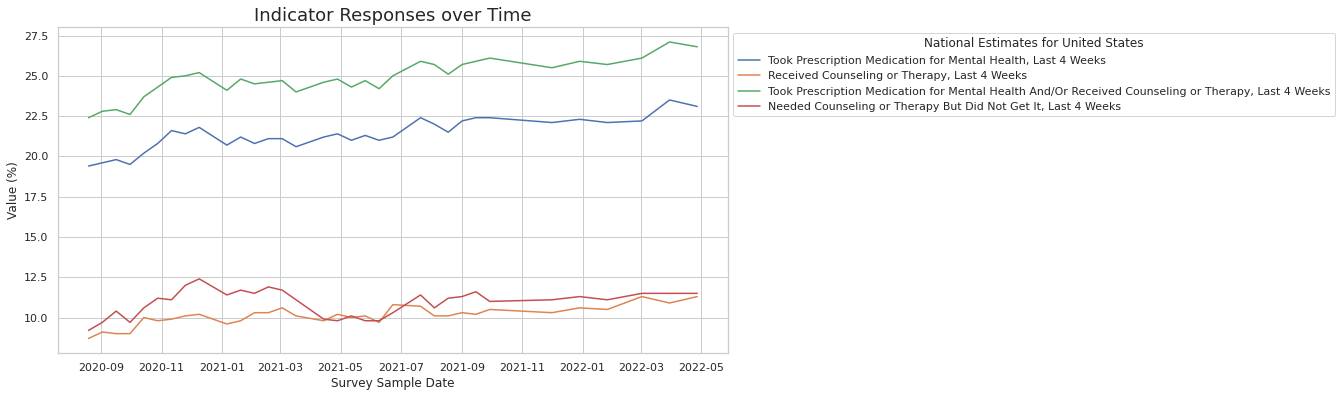

In [43]:

fig, ax = plt.subplots(figsize = ( 12 , 6 ))

graph = sns.lineplot(data = mhc_data_national_agg
             , ax = ax
             , x = 'date'
             , y = 'Value'
             , hue = 'Indicator'
            )


# Set label for x-axis
ax.set_xlabel( "Survey Sample Date" , size = 12 )
  
# Set label for y-axis
ax.set_ylabel( "Value (%)" , size = 12 )
  
# Set title for plot
ax.set_title( "Indicator Responses over Time" , size = 18 )

ax.legend(loc=0,title = "National Estimates for United States")
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1,1))

# graph.axvline(dt.datetime(2016, 1, 17), linestyle='--', lw = .5)
# graph.axvline(dt.datetime(2016, 2, 11), linestyle='--', lw = .5)
# graph.axvline(dt.datetime(2016, 3, 9), linestyle='--', lw = .5)

seeing some slight increases across all indicators near the end of 2020, after that it smooths out - gradual increase over time. another small bump between 7/2021 and 9/2021

Note: would like to add some reference event lines -> break out indicicators into individual visuals, so that its easier to digest once reference lines are added

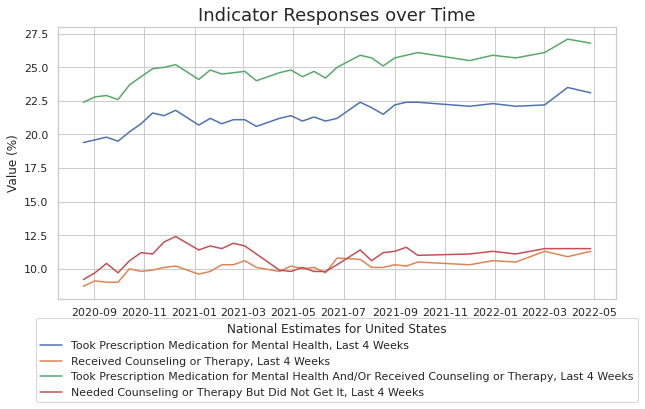

In [45]:

fig, ax = plt.subplots(figsize = ( 10 , 5 ))

graph = sns.lineplot(data = mhc_data_national_agg
             , ax = ax
             , x = 'date'
             , y = 'Value'
             , hue = 'Indicator'
            )


# Set label for x-axis
ax.set_xlabel( " " , size = 12 )
  
# Set label for y-axis
ax.set_ylabel( "Value (%)" , size = 12 )
  
# Set title for plot
ax.set_title( "Indicator Responses over Time" , size = 18 )

ax.legend(loc=0,title = "National Estimates for United States")
sns.move_legend(ax, 'lower center', bbox_to_anchor=(0.5,-0.4))


# State Level Analysis


In [46]:
indicator_list = list(mhc_data['Indicator'].unique())

In [47]:
mhc_data.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval,Quartile Range,Suppression Flag
0,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,2,13,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,19.4,19.0,19.8,19.0 - 19.8,NaN,NaN
1,Took Prescription Medication for Mental Health...,By Age,United States,18 - 29 years,2,13,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,18.7,17.2,20.3,17.2 - 20.3,NaN,NaN
2,Took Prescription Medication for Mental Health...,By Age,United States,30 - 39 years,2,13,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,18.3,17.3,19.2,17.3 - 19.2,NaN,NaN
3,Took Prescription Medication for Mental Health...,By Age,United States,40 - 49 years,2,13,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,20.4,19.5,21.3,19.5 - 21.3,NaN,NaN
4,Took Prescription Medication for Mental Health...,By Age,United States,50 - 59 years,2,13,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,21.2,20.2,22.2,20.2 - 22.2,NaN,NaN


In [48]:
mhc_data.columns

Index(['Indicator', 'Group', 'State', 'Subgroup', 'Phase', 'Time Period',
       'Time Period Label', 'Time Period Start Date', 'Time Period End Date',
       'Value', 'LowCI', 'HighCI', 'Confidence Interval', 'Quartile Range',
       'Suppression Flag'],
      dtype='object')

In [49]:
mhc_data_state_agg = mhc_data.loc[mhc_data['Group']=='By State']

In [50]:
mhc_data_state_agg['date'] = pd.to_datetime(mhc_data_state_agg['Time Period Start Date'])

In [52]:
mhc_data_state_took_meds = mhc_data_state_agg.loc[mhc_data_state_agg['Indicator']== 'Took Prescription Medication for Mental Health, Last 4 Weeks']

mhc_data_state_received_help =  mhc_data_state_agg.loc[mhc_data_state_agg['Indicator']== 'Received Counseling or Therapy, Last 4 Weeks']

mhc_data_state_both_cares_received =  mhc_data_state_agg.loc[mhc_data_state_agg['Indicator']== 'Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks']

mhc_data_state_did_not_get_care =  mhc_data_state_agg.loc[mhc_data_state_agg['Indicator']== 'Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks']

df_list = [mhc_data_state_took_meds,mhc_data_state_received_help,mhc_data_state_both_cares_received,mhc_data_state_did_not_get_care]

mhc_data_state_took_meds_agg = pd.DataFrame(mhc_data_state_took_meds.groupby(['Indicator','State'])['Value'].mean().sort_values(ascending = False)).reset_index()

mhc_data_state_received_help_agg =  pd.DataFrame(mhc_data_state_received_help.groupby(['Indicator','State'])['Value'].mean().sort_values(ascending = False)).reset_index()

mhc_data_state_both_cares_received_agg =  pd.DataFrame(mhc_data_state_both_cares_received.groupby(['Indicator','State'])['Value'].mean().sort_values(ascending = False)).reset_index()

mhc_data_state_did_not_get_care_agg =  pd.DataFrame(mhc_data_state_did_not_get_care.groupby(['Indicator','State'])['Value'].mean().sort_values(ascending = False)).reset_index()



In [53]:
print(mhc_data_state_took_meds_agg.shape)
print(mhc_data_state_received_help_agg.shape)
print(mhc_data_state_both_cares_received_agg.shape)
print(mhc_data_state_did_not_get_care_agg.shape)


(51, 3)
(51, 3)
(51, 3)
(51, 3)


In [54]:
## joining: Received any care vs Received no care

#merged_contrib_aggs = contrib_counts.merge(contrib_sums, on = 'cand_nm', how='left')

merged_df_state = mhc_data_state_both_cares_received_agg.merge(mhc_data_state_did_not_get_care_agg
                                                              , on = 'State'
                                                              , how = 'left')

In [55]:
merged_df_state['Indicator_x'].value_counts()
merged_df_state['Indicator_y'].value_counts()

Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks    51
Name: Indicator_y, dtype: int64

In [56]:
merged_df_state.rename(columns={'Value_x': 'received_care_pct', 'Value_y': 'not_receive_care_pct'}, inplace=True)


In [57]:
merged_df_state.head()

,Indicator_x,State,received_care_pct,Indicator_y,not_receive_care_pct
0,Took Prescription Medication for Mental Health...,West Virginia,30.742424,Needed Counseling or Therapy But Did Not Get I...,10.721212
1,Took Prescription Medication for Mental Health...,Utah,29.824242,Needed Counseling or Therapy But Did Not Get I...,13.778788
2,Took Prescription Medication for Mental Health...,Kentucky,29.721212,Needed Counseling or Therapy But Did Not Get I...,11.209091
3,Took Prescription Medication for Mental Health...,Vermont,29.681818,Needed Counseling or Therapy But Did Not Get I...,10.340000
4,Took Prescription Medication for Mental Health...,Maine,29.633333,Needed Counseling or Therapy But Did Not Get I...,10.345455


In [58]:
merged_df_state = merged_df_state[['State','received_care_pct','not_receive_care_pct']]

In [59]:
# Top and Bottom 5 (% of Folks to received some kind of care)
top_five_states_received = merged_df_state.sort_values(by='received_care_pct', ascending = False).head()
bottom_five_states_received = merged_df_state.sort_values(by='received_care_pct', ascending = False).tail()

In [60]:
top_five_states_received_list = list(top_five_states_received['State'].unique())
top_five_states_received

,State,received_care_pct,not_receive_care_pct
0,West Virginia,30.742424,10.721212
1,Utah,29.824242,13.778788
2,Kentucky,29.721212,11.209091
3,Vermont,29.681818,10.340000
4,Maine,29.633333,10.345455


In [61]:
bottom_five_states_received_list = list(bottom_five_states_received['State'].unique())
bottom_five_states_received

,State,received_care_pct,not_receive_care_pct
46,Texas,22.006061,11.881818
47,New Jersey,21.984848,8.800000
48,California,21.278788,11.651515
49,Nevada,20.463636,11.469697
50,Hawaii,16.930303,7.518750


In [62]:
# Top and Bottom 5 (% of Folks needing, but not receiving any type of care)
top_five_states_not_received = merged_df_state.sort_values(by='not_receive_care_pct', ascending = False).head()
bottom_five_states_not_received = merged_df_state.sort_values(by='not_receive_care_pct', ascending = False).tail()

In [63]:
top_five_states_not_received_list = list(top_five_states_not_received['State'].unique())
top_five_states_not_received

,State,received_care_pct,not_receive_care_pct
8,Oregon,28.618182,14.439394
1,Utah,29.824242,13.778788
12,District of Columbia,27.893939,13.672727
25,Colorado,26.503030,13.027273
24,Washington,26.506061,12.896970


In [64]:
bottom_five_states_not_received_list = list(bottom_five_states_not_received['State'].unique())
bottom_five_states_not_received

,State,received_care_pct,not_receive_care_pct
31,Wisconsin,25.678788,9.239394
47,New Jersey,21.984848,8.800000
33,North Dakota,25.127273,8.396875
39,South Dakota,24.030303,8.324242
50,Hawaii,16.930303,7.518750


# Final State-level Charts

# Any Care Received:
## A) Top States

In [65]:
line_chart_data = mhc_data_state_both_cares_received.loc[mhc_data_state_both_cares_received['State'].isin(top_five_states_received_list)]


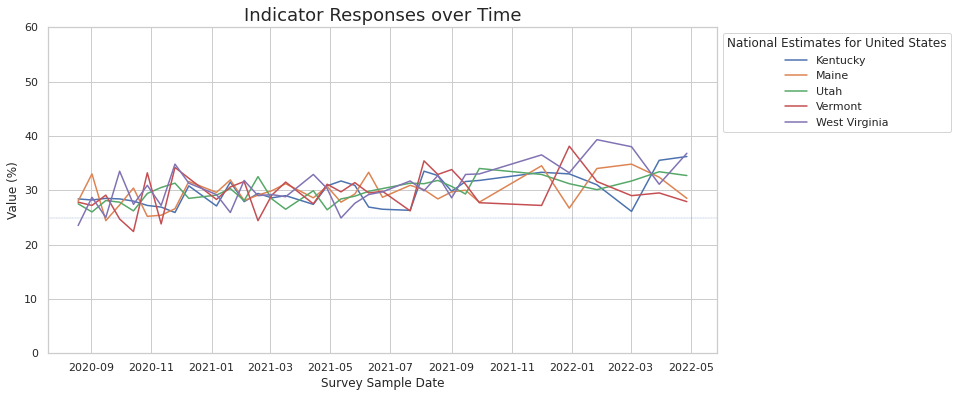

In [66]:

fig, ax = plt.subplots(figsize = ( 12 , 6 ))

line_chart_data = mhc_data_state_both_cares_received.loc[mhc_data_state_both_cares_received['State'].isin(top_five_states_received_list)]

graph = sns.lineplot(data = line_chart_data
             , ax = ax
             , x = 'date'
             , y = 'Value'
             , hue = 'State'
            )


# Set label for x-axis
ax.set_xlabel( "Survey Sample Date" , size = 12 )
  
# Set label for y-axis
ax.set_ylabel( "Value (%)" , size = 12 )
  
# Set title for plot
ax.set_title( "Indicator Responses over Time" , size = 18 )

ax.legend(loc=0,title = "National Estimates for United States")
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1,1))

# Set Y axis lims (show full % range to smooth it out?)
ax.set(ylim = (0,60))

# ref line on national average all-time

graph.axhline(mhc_data_national_both_cares_received['Value'].mean(), linestyle='--', lw = 0.3)


## B) Bottom States

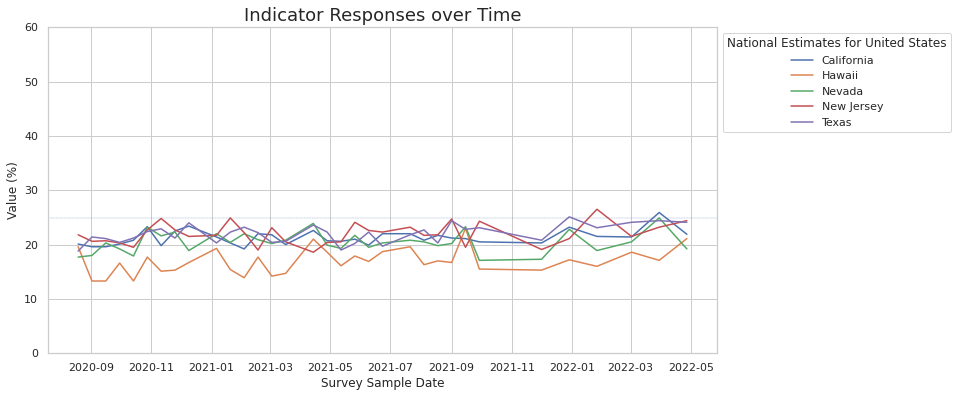

In [67]:

fig, ax = plt.subplots(figsize = ( 12 , 6 ))

line_chart_data = mhc_data_state_both_cares_received.loc[mhc_data_state_both_cares_received['State'].isin(bottom_five_states_received_list)]

graph = sns.lineplot(data = line_chart_data
             , ax = ax
             , x = 'date'
             , y = 'Value'
             , hue = 'State'
            )


# Set label for x-axis
ax.set_xlabel( "Survey Sample Date" , size = 12 )
  
# Set label for y-axis
ax.set_ylabel( "Value (%)" , size = 12 )
  
# Set title for plot
ax.set_title( "Indicator Responses over Time" , size = 18 )

ax.legend(loc=0,title = "National Estimates for United States")
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1,1))

# Set Y axis lims (show full % range to smooth it out?)
ax.set(ylim = (0,60))

# ref line on national average all-time

graph.axhline(mhc_data_national_both_cares_received['Value'].mean(), linestyle='--', lw = 0.3)

# graph.axvline(dt.datetime(2016, 2, 11), linestyle='--', lw = .5)
# graph.axvline(dt.datetime(2016, 3, 9), linestyle='--', lw = .5)

# Exploring folium library

In [68]:
m = folium.Map(location=[40, -95], zoom_start=4)

# show the map
m

In [69]:
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/us-states.json"
state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"
state_data = pd.read_csv(state_unemployment)

In [70]:
state_geo

'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json'

In [71]:
state_unemployment

'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/US_Unemployment_Oct2012.csv'

In [72]:
states = pd.read_html('https://developers.google.com/public-data/docs/canonical/states_csv')

In [73]:
states

[   state   latitude   longitude                  name
 0     AK  63.588753 -154.493062                Alaska
 1     AL  32.318231  -86.902298               Alabama
 2     AR  35.201050  -91.831833              Arkansas
 3     AZ  34.048928 -111.093731               Arizona
 4     CA  36.778261 -119.417932            California
 5     CO  39.550051 -105.782067              Colorado
 6     CT  41.603221  -73.087749           Connecticut
 7     DC  38.905985  -77.033418  District of Columbia
 8     DE  38.910832  -75.527670              Delaware
 9     FL  27.664827  -81.515754               Florida
 10    GA  32.157435  -82.907123               Georgia
 11    HI  19.898682 -155.665857                Hawaii
 12    IA  41.878003  -93.097702                  Iowa
 13    ID  44.068202 -114.742041                 Idaho
 14    IL  40.633125  -89.398528              Illinois
 15    IN  40.551217  -85.602364               Indiana
 16    KS  39.011902  -98.484246                Kansas
 17    KY 

In [74]:
mhc_data_state_agg.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval,Quartile Range,Suppression Flag,date
21,Took Prescription Medication for Mental Health...,By State,Alabama,Alabama,2,13,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,22.3,19.6,25.1,19.6 - 25.1,20.6-22.5,NaN,2020-08-19
22,Took Prescription Medication for Mental Health...,By State,Alaska,Alaska,2,13,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,16.7,14.2,19.5,14.2 - 19.5,12.2-18.4,NaN,2020-08-19
23,Took Prescription Medication for Mental Health...,By State,Arizona,Arizona,2,13,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,18.3,16.1,20.7,16.1 - 20.7,12.2-18.4,NaN,2020-08-19
24,Took Prescription Medication for Mental Health...,By State,Arkansas,Arkansas,2,13,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,24.1,20.8,27.7,20.8 - 27.7,22.6-26.8,NaN,2020-08-19
25,Took Prescription Medication for Mental Health...,By State,California,California,2,13,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,15.8,14.4,17.4,14.4 - 17.4,12.2-18.4,NaN,2020-08-19


In [75]:
mhc_data_state_agg['date'].value_counts().sort_values()

2020-08-19    204
2020-09-30    204
2020-10-14    204
2020-10-28    204
2020-11-11    204
2020-11-25    204
2020-12-09    204
2021-01-06    204
2021-01-20    204
2021-02-03    204
2021-02-17    204
2021-03-17    204
2021-03-03    204
2021-04-14    204
2020-09-02    204
2020-09-16    204
2021-04-28    204
2021-06-09    204
2021-06-23    204
2021-07-21    204
2021-08-04    204
2021-08-18    204
2021-09-01    204
2021-09-15    204
2021-09-29    204
2021-12-01    204
2021-12-29    204
2022-01-26    204
2022-03-02    204
2022-03-30    204
2021-05-12    204
2021-05-26    204
2022-04-27    204
Name: date, dtype: int64

In [76]:
mhc_data_state_agg[mhc_data_state_agg['date']=='2020-08-19']['State']

21           Alabama
22            Alaska
23           Arizona
24          Arkansas
25        California
           ...      
283         Virginia
284       Washington
285    West Virginia
286        Wisconsin
287          Wyoming
Name: State, Length: 204, dtype: object

In [77]:
mhc_data_state_agg.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval,Quartile Range,Suppression Flag,date
21,Took Prescription Medication for Mental Health...,By State,Alabama,Alabama,2,13,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,22.3,19.6,25.1,19.6 - 25.1,20.6-22.5,NaN,2020-08-19
22,Took Prescription Medication for Mental Health...,By State,Alaska,Alaska,2,13,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,16.7,14.2,19.5,14.2 - 19.5,12.2-18.4,NaN,2020-08-19
23,Took Prescription Medication for Mental Health...,By State,Arizona,Arizona,2,13,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,18.3,16.1,20.7,16.1 - 20.7,12.2-18.4,NaN,2020-08-19
24,Took Prescription Medication for Mental Health...,By State,Arkansas,Arkansas,2,13,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,24.1,20.8,27.7,20.8 - 27.7,22.6-26.8,NaN,2020-08-19
25,Took Prescription Medication for Mental Health...,By State,California,California,2,13,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,15.8,14.4,17.4,14.4 - 17.4,12.2-18.4,NaN,2020-08-19


# Dataset analysis

In [80]:
first_reading_mhc_state_map_received_care = mhc_data_state_agg.loc[(mhc_data_state_agg['date']=='2020-08-19') 
                                                                   & (mhc_data_state_agg['Indicator']=='Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks')]

In [81]:
first_reading_mhc_state_map_received_care.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval,Quartile Range,Suppression Flag,date
165,Took Prescription Medication for Mental Health...,By State,Alabama,Alabama,2,13,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,25.2,21.9,28.6,21.9 - 28.6,23.6-25.3,NaN,2020-08-19
166,Took Prescription Medication for Mental Health...,By State,Alaska,Alaska,2,13,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,19.2,16.6,21.9,16.6 - 21.9,17.7-21.7,NaN,2020-08-19
167,Took Prescription Medication for Mental Health...,By State,Arizona,Arizona,2,13,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,20.2,17.9,22.6,17.9 - 22.6,17.7-21.7,NaN,2020-08-19
168,Took Prescription Medication for Mental Health...,By State,Arkansas,Arkansas,2,13,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,25.3,22.0,28.8,22.0 - 28.8,23.6-25.3,NaN,2020-08-19
169,Took Prescription Medication for Mental Health...,By State,California,California,2,13,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,20.1,18.3,21.9,18.3 - 21.9,17.7-21.7,NaN,2020-08-19


# create long and lat dataset, then merge
# follow up on 'table'

In [82]:
## Filter to only last readings & to indicator of interest
first_reading_mhc_state_map_received_care_t = mhc_data_state_agg.loc[(mhc_data_state_agg['date']=='2020-08-19') 
                                            & (mhc_data_state_agg['Indicator']=='Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks')]
# Drop unneeded columns
first_reading_mhc_state_map_received_care_t = first_reading_mhc_state_map_received_care_t[['State','Value']]

# Drop unneeded record
first_reading_mhc_state_map_received_care_t = first_reading_mhc_state_map_received_care_t[first_reading_mhc_state_map_received_care_t['State'] != 'District of Columbia']

In [83]:
## Filter to only last readings & to indicator of interest
last_reading_mhc_state_map_received_care_t = mhc_data_state_agg.loc[(mhc_data_state_agg['date']=='2022-04-27') 
                                            & (mhc_data_state_agg['Indicator']=='Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks')]
# Drop unneeded columns
last_reading_mhc_state_map_received_care_t = last_reading_mhc_state_map_received_care_t[['State','Value']]

# drop unneeded record
last_reading_mhc_state_map_received_care_t = last_reading_mhc_state_map_received_care_t[last_reading_mhc_state_map_received_care_t['State'] != 'District of Columbia']


In [84]:
geo_data_states_t = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json'

In [85]:
step = cmp.StepColormap(
 ['#FEF001','#FFCE03','#FD9A01','#FD6104','#FF2C05','#F00505'],   
 vmin=18, vmax=36,
 index=[18,21,24,27,30,33,36],  #for change in the colors, not used fr linear
 caption='Color Scale for Map'    #Caption for Color scale or Legend
)
step

### A) First Reading of Received Any Care Indicator

In [86]:
unemployment_dict = first_reading_mhc_state_map_received_care_t.set_index('State')['Value']
geo_json_data = json.loads(requests.get(geo_data_states_t).text)

usa_linear = folium.Map([48,-102], tiles='cartodbpositron', zoom_start=3)
folium.GeoJson(
    geo_json_data,
    style_function=lambda feature: {
        'fillColor': step(unemployment_dict[feature['properties']['name']]),
        'color': 'black',     #border color for the color fills
        'weight': 1,          #how thick the border has to be
        'fillOpacity': 0.80,
        'dashArray': '5, 3'  #dashed lines length,space between them
    }
).add_to(usa_linear)

# Add title
loc = 'Respondents who Received Mental Health Care in last 4 weeks'
sub_loc = 'Time Period: Start of Survey Collection (8/19/2020)'

title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   
sub_title_html = '''
             <h4 align="center" style="font-size:12px"><b>{}</b></h3>
             '''.format(sub_loc)   

usa_linear.get_root().html.add_child(folium.Element(title_html))
usa_linear.get_root().html.add_child(folium.Element(sub_title_html))

step.add_to(usa_linear)   #adds colorscale or legend
usa_linear

### B) Last Reading of Received Any Care Indicator


In [87]:
unemployment_dict = last_reading_mhc_state_map_received_care_t.set_index('State')['Value']
geo_json_data = json.loads(requests.get(geo_data_states_t).text)

usa_linear = folium.Map([48,-102], tiles='cartodbpositron', zoom_start=3)
folium.GeoJson(
    geo_json_data,
    style_function=lambda feature: {
        'fillColor': step(unemployment_dict[feature['properties']['name']]),
        'color': 'black',     #border color for the color fills
        'weight': 1,          #how thick the border has to be
        'fillOpacity': 0.80,
        'dashArray': '5, 3'  #dashed lines length,space between them
    }
).add_to(usa_linear)

# Add title
loc = 'Respondents who Received Mental Health Care in last 4 weeks'
sub_loc = 'Time Period: End of Survey Collection (4/27/2022)'

title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   
sub_title_html = '''
             <h4 align="center" style="font-size:12px"><b>{}</b></h3>
             '''.format(sub_loc)   

usa_linear.get_root().html.add_child(folium.Element(title_html))
usa_linear.get_root().html.add_child(folium.Element(sub_title_html))

step.add_to(usa_linear)   #adds colorscale or legend
usa_linear

# Communites Impacted 

In [89]:
sk_mental_health = pd.read_csv("Mental_Health_Care_in_the_Last_4_Weeks.csv")
sk_mental_health = sk_mental_health[sk_mental_health['Value'].notna()]

In [90]:
sk_mental_health.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval,Quartile Range,Suppression Flag
0,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,2,13,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,19.4,19.0,19.8,19.0 - 19.8,NaN,NaN
1,Took Prescription Medication for Mental Health...,By Age,United States,18 - 29 years,2,13,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,18.7,17.2,20.3,17.2 - 20.3,NaN,NaN
2,Took Prescription Medication for Mental Health...,By Age,United States,30 - 39 years,2,13,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,18.3,17.3,19.2,17.3 - 19.2,NaN,NaN
3,Took Prescription Medication for Mental Health...,By Age,United States,40 - 49 years,2,13,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,20.4,19.5,21.3,19.5 - 21.3,NaN,NaN
4,Took Prescription Medication for Mental Health...,By Age,United States,50 - 59 years,2,13,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,21.2,20.2,22.2,20.2 - 22.2,NaN,NaN


In [91]:
sk_age = sk_mental_health[sk_mental_health['Group'] == 'By Age']
sk_age_18_29 = sk_age[sk_age['Subgroup'] == '18 - 29 years']
sk_age_30_39 = sk_age[sk_age['Subgroup'] == '30 - 39 years']
sk_age_40_49 = sk_age[sk_age['Subgroup'] == '40 - 49 years']
sk_age_50_59 = sk_age[sk_age['Subgroup'] == '50 - 59 years']
sk_age_60_69 = sk_age[sk_age['Subgroup'] == '60 - 69 years']
sk_age_70_79 = sk_age[sk_age['Subgroup'] == '70 - 79 years']
sk_age_80_above = sk_age[sk_age['Subgroup'] == '80 years and above']

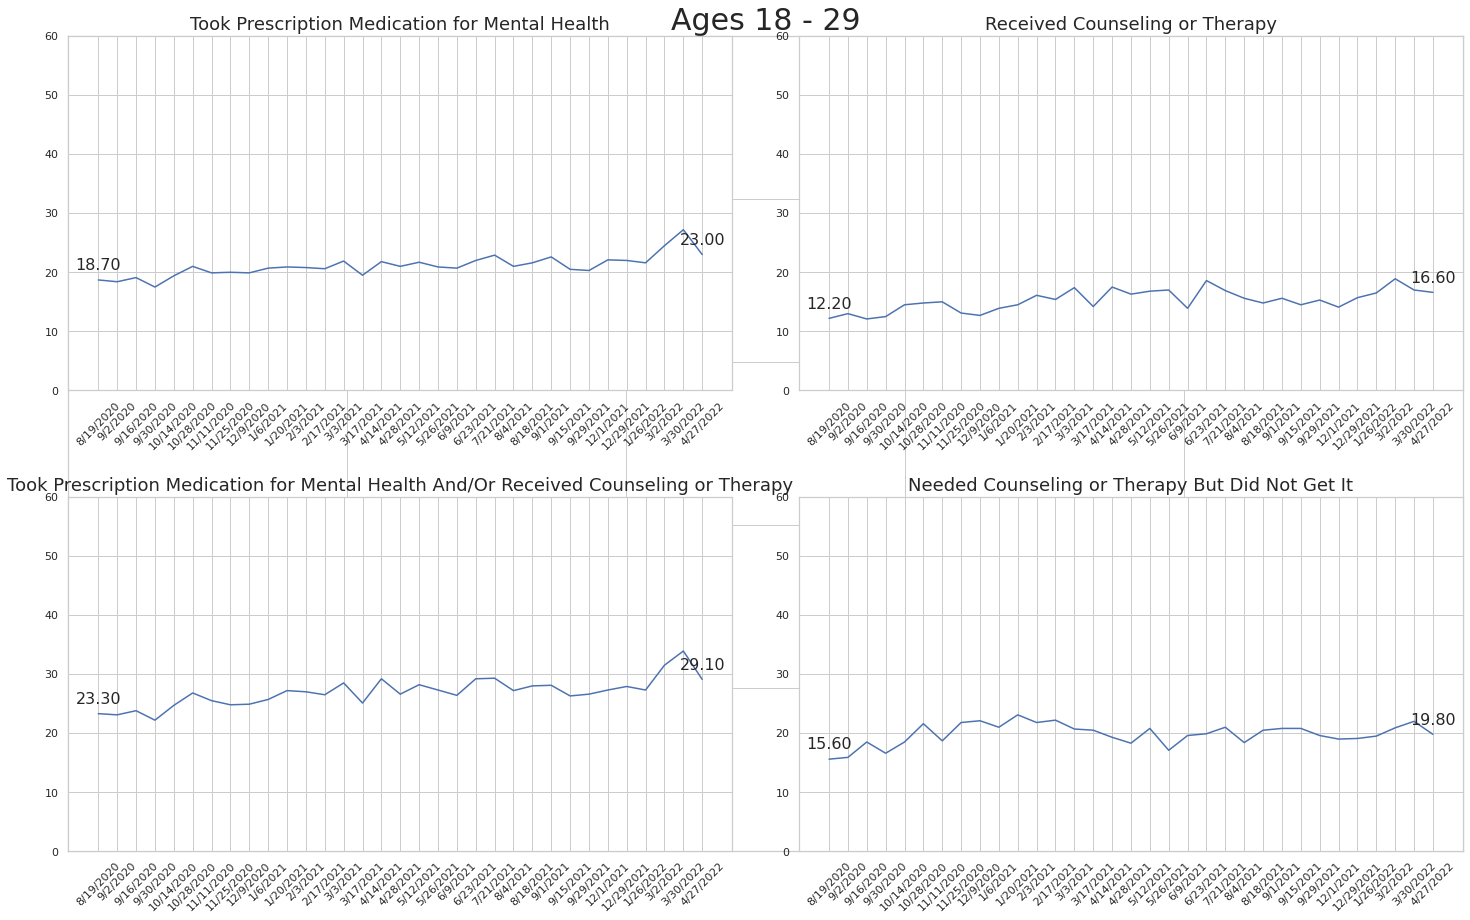

In [92]:
# Ages 18 - 29
topleft = sk_age_18_29[sk_age_18_29['Indicator'] == 'Took Prescription Medication for Mental Health, Last 4 Weeks']
topright = sk_age_18_29[sk_age_18_29['Indicator'] == 'Received Counseling or Therapy, Last 4 Weeks']
bottomleft = sk_age_18_29[sk_age_18_29['Indicator'] == 'Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks']
bottomright = sk_age_18_29[sk_age_18_29['Indicator'] =='Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks']

fig = plt.figure(figsize = (25, 15));
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False);

plt.title("Ages 18 - 29", fontsize = 30);
ax1 = fig.add_subplot(221);
ax2 = fig.add_subplot(222);
ax3 = fig.add_subplot(223);
ax4 = fig.add_subplot(224);
ax1.set_title('Took Prescription Medication for Mental Health', fontsize=18);
ax2.set_title('Received Counseling or Therapy', fontsize=18);
ax3.set_title('Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy', fontsize=18);
ax4.set_title('Needed Counseling or Therapy But Did Not Get It', fontsize=18);

plt.subplots_adjust(hspace=0.3, wspace = 0.1);

ax1.plot(topleft['Time Period Start Date'], topleft['Value']);
ax1.set_xticklabels(topleft['Time Period Start Date'], rotation=45);
ax1.set_ylim(0, 60);
temp = topleft[(topleft['Time Period'] == topleft['Time Period'].min()) | (topleft['Time Period'] == topleft['Time Period'].max())]
for x,y in zip(temp['Time Period Start Date'],temp['Value']):
    
    label = "{:.2f}".format(y)

    ax1.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',
                fontsize = 16)

ax2.plot(topright['Time Period Start Date'], topright['Value']);
ax2.set_xticklabels(topright['Time Period Start Date'], rotation=45);
ax2.set_ylim(0, 60);
temp = topright[(topright['Time Period'] == topright['Time Period'].min()) | (topright['Time Period'] == topright['Time Period'].max())]
for x,y in zip(temp['Time Period Start Date'],temp['Value']):
    
    label = "{:.2f}".format(y)

    ax2.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',
                fontsize = 16)

ax3.plot(bottomleft['Time Period Start Date'], bottomleft['Value']);
ax3.set_xticklabels(bottomleft['Time Period Start Date'], rotation=45);
ax3.set_ylim(0, 60);
temp = bottomleft[(bottomleft['Time Period'] == bottomleft['Time Period'].min()) | (bottomleft['Time Period'] == bottomleft['Time Period'].max())]
for x,y in zip(temp['Time Period Start Date'],temp['Value']):
    
    label = "{:.2f}".format(y)

    ax3.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',
                fontsize = 16)

ax4.plot(bottomright['Time Period Start Date'], bottomright['Value']);
ax4.set_xticklabels(bottomright['Time Period Start Date'], rotation=45);
ax4.set_ylim(0, 60);
temp = bottomright[(bottomright['Time Period'] == bottomright['Time Period'].min()) | (bottomright['Time Period'] == bottomright['Time Period'].max())]
for x,y in zip(temp['Time Period Start Date'],temp['Value']):
    
    label = "{:.2f}".format(y)

    ax4.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',
                fontsize = 16)

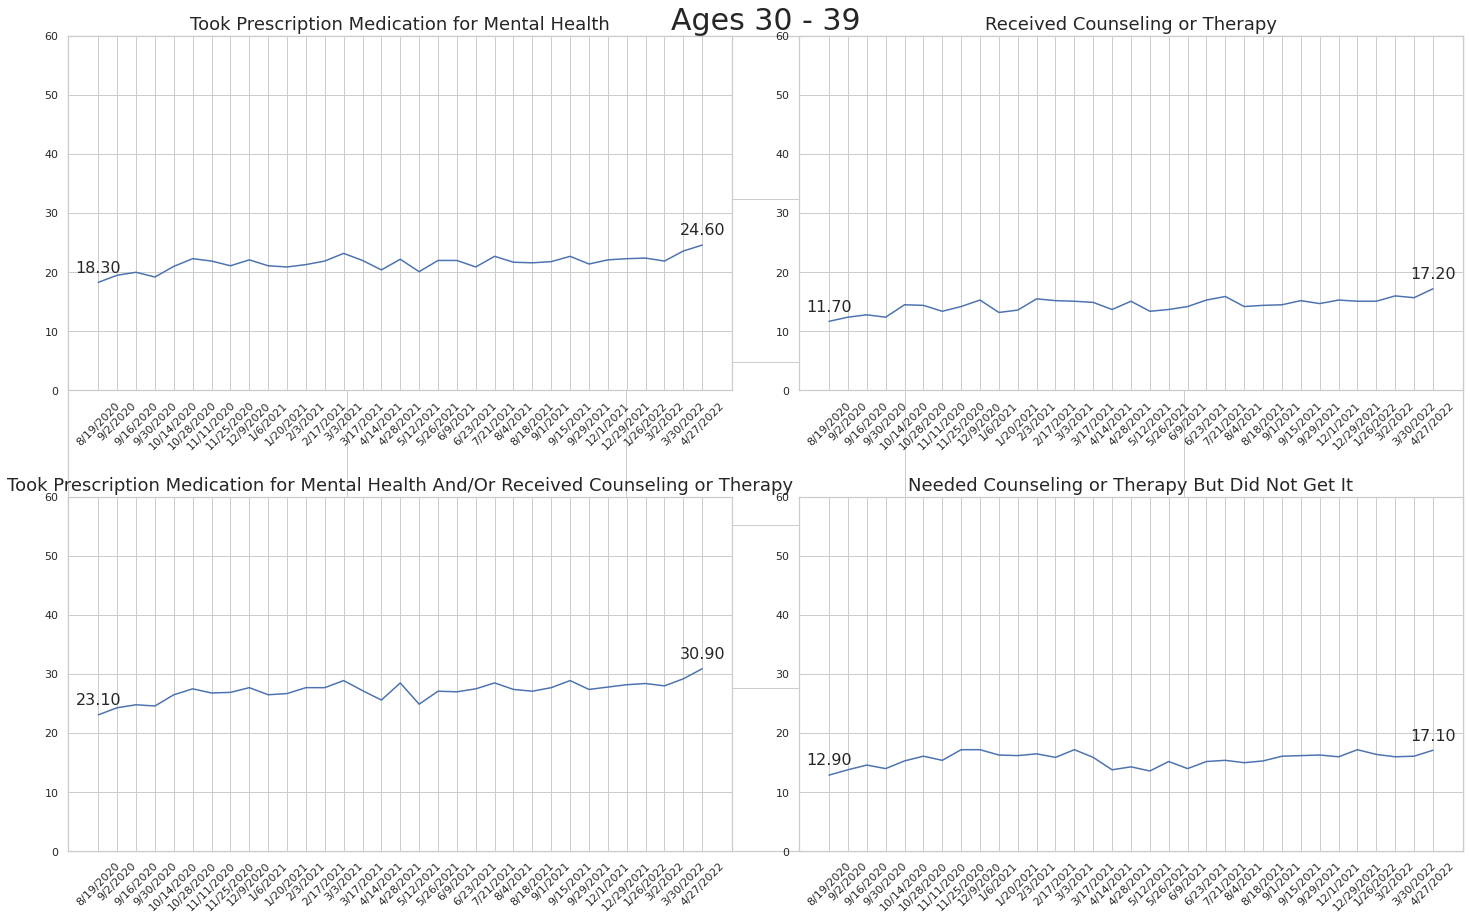

In [93]:
# Ages 30 - 39
topleft = sk_age_30_39[sk_age_30_39['Indicator'] == 'Took Prescription Medication for Mental Health, Last 4 Weeks']
topright = sk_age_30_39[sk_age_30_39['Indicator'] == 'Received Counseling or Therapy, Last 4 Weeks']
bottomleft = sk_age_30_39[sk_age_30_39['Indicator'] == 'Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks']
bottomright = sk_age_30_39[sk_age_30_39['Indicator'] =='Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks']

fig = plt.figure(figsize = (25, 15));
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False);

plt.title("Ages 30 - 39", fontsize = 30);
ax1 = fig.add_subplot(221);
ax2 = fig.add_subplot(222);
ax3 = fig.add_subplot(223);
ax4 = fig.add_subplot(224);
ax1.set_title('Took Prescription Medication for Mental Health', fontsize=18);
ax2.set_title('Received Counseling or Therapy', fontsize=18);
ax3.set_title('Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy', fontsize=18);
ax4.set_title('Needed Counseling or Therapy But Did Not Get It', fontsize=18);

plt.subplots_adjust(hspace=0.3, wspace = 0.1);

ax1.plot(topleft['Time Period Start Date'], topleft['Value']);
ax1.set_xticklabels(topleft['Time Period Start Date'], rotation=45);
ax1.set_ylim(0, 60);
temp = topleft[(topleft['Time Period'] == topleft['Time Period'].min()) | (topleft['Time Period'] == topleft['Time Period'].max())]
for x,y in zip(temp['Time Period Start Date'],temp['Value']):
    
    label = "{:.2f}".format(y)

    ax1.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',
                fontsize = 16)

ax2.plot(topright['Time Period Start Date'], topright['Value']);
ax2.set_xticklabels(topright['Time Period Start Date'], rotation=45);
ax2.set_ylim(0, 60);
temp = topright[(topright['Time Period'] == topright['Time Period'].min()) | (topright['Time Period'] == topright['Time Period'].max())]
for x,y in zip(temp['Time Period Start Date'],temp['Value']):
    
    label = "{:.2f}".format(y)

    ax2.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',
                fontsize = 16)

ax3.plot(bottomleft['Time Period Start Date'], bottomleft['Value']);
ax3.set_xticklabels(bottomleft['Time Period Start Date'], rotation=45);
ax3.set_ylim(0, 60);
temp = bottomleft[(bottomleft['Time Period'] == bottomleft['Time Period'].min()) | (bottomleft['Time Period'] == bottomleft['Time Period'].max())]
for x,y in zip(temp['Time Period Start Date'],temp['Value']):
    
    label = "{:.2f}".format(y)

    ax3.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',
                fontsize = 16)

ax4.plot(bottomright['Time Period Start Date'], bottomright['Value']);
ax4.set_xticklabels(bottomright['Time Period Start Date'], rotation=45);
ax4.set_ylim(0, 60);
temp = bottomright[(bottomright['Time Period'] == bottomright['Time Period'].min()) | (bottomright['Time Period'] == bottomright['Time Period'].max())]
for x,y in zip(temp['Time Period Start Date'],temp['Value']):
    
    label = "{:.2f}".format(y)

    ax4.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',
                fontsize = 16)

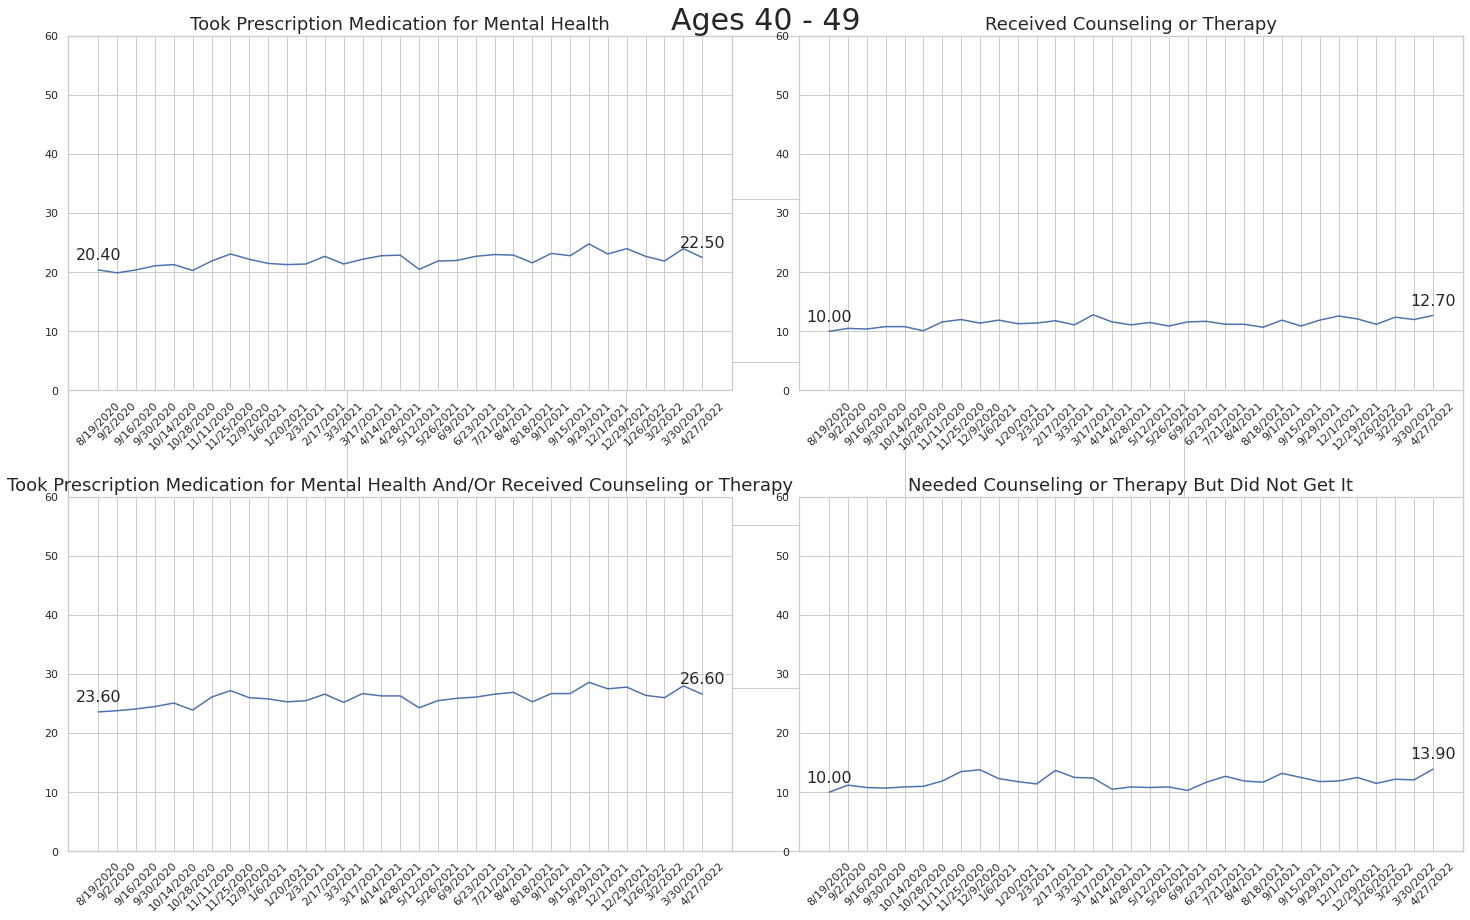

In [94]:
# Ages 40 - 49
topleft = sk_age_40_49[sk_age_40_49['Indicator'] == 'Took Prescription Medication for Mental Health, Last 4 Weeks']
topright = sk_age_40_49[sk_age_40_49['Indicator'] == 'Received Counseling or Therapy, Last 4 Weeks']
bottomleft = sk_age_40_49[sk_age_40_49['Indicator'] == 'Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks']
bottomright = sk_age_40_49[sk_age_40_49['Indicator'] =='Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks']

fig = plt.figure(figsize = (25, 15));
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False);

plt.title("Ages 40 - 49", fontsize = 30);
ax1 = fig.add_subplot(221);
ax2 = fig.add_subplot(222);
ax3 = fig.add_subplot(223);
ax4 = fig.add_subplot(224);
ax1.set_title('Took Prescription Medication for Mental Health', fontsize=18);
ax2.set_title('Received Counseling or Therapy', fontsize=18);
ax3.set_title('Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy', fontsize=18);
ax4.set_title('Needed Counseling or Therapy But Did Not Get It', fontsize=18);

plt.subplots_adjust(hspace=0.3, wspace = 0.1);

ax1.plot(topleft['Time Period Start Date'], topleft['Value']);
ax1.set_xticklabels(topleft['Time Period Start Date'], rotation=45);
ax1.set_ylim(0, 60);
temp = topleft[(topleft['Time Period'] == topleft['Time Period'].min()) | (topleft['Time Period'] == topleft['Time Period'].max())]
for x,y in zip(temp['Time Period Start Date'],temp['Value']):
    
    label = "{:.2f}".format(y)

    ax1.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',
                fontsize = 16)

ax2.plot(topright['Time Period Start Date'], topright['Value']);
ax2.set_xticklabels(topright['Time Period Start Date'], rotation=45);
ax2.set_ylim(0, 60);
temp = topright[(topright['Time Period'] == topright['Time Period'].min()) | (topright['Time Period'] == topright['Time Period'].max())]
for x,y in zip(temp['Time Period Start Date'],temp['Value']):
    
    label = "{:.2f}".format(y)

    ax2.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',
                fontsize = 16)

ax3.plot(bottomleft['Time Period Start Date'], bottomleft['Value']);
ax3.set_xticklabels(bottomleft['Time Period Start Date'], rotation=45);
ax3.set_ylim(0, 60);
temp = bottomleft[(bottomleft['Time Period'] == bottomleft['Time Period'].min()) | (bottomleft['Time Period'] == bottomleft['Time Period'].max())]
for x,y in zip(temp['Time Period Start Date'],temp['Value']):
    
    label = "{:.2f}".format(y)

    ax3.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',
                fontsize = 16)

ax4.plot(bottomright['Time Period Start Date'], bottomright['Value']);
ax4.set_xticklabels(bottomright['Time Period Start Date'], rotation=45);
ax4.set_ylim(0, 60);
temp = bottomright[(bottomright['Time Period'] == bottomright['Time Period'].min()) | (bottomright['Time Period'] == bottomright['Time Period'].max())]
for x,y in zip(temp['Time Period Start Date'],temp['Value']):
    
    label = "{:.2f}".format(y)

    ax4.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',
                fontsize = 16)

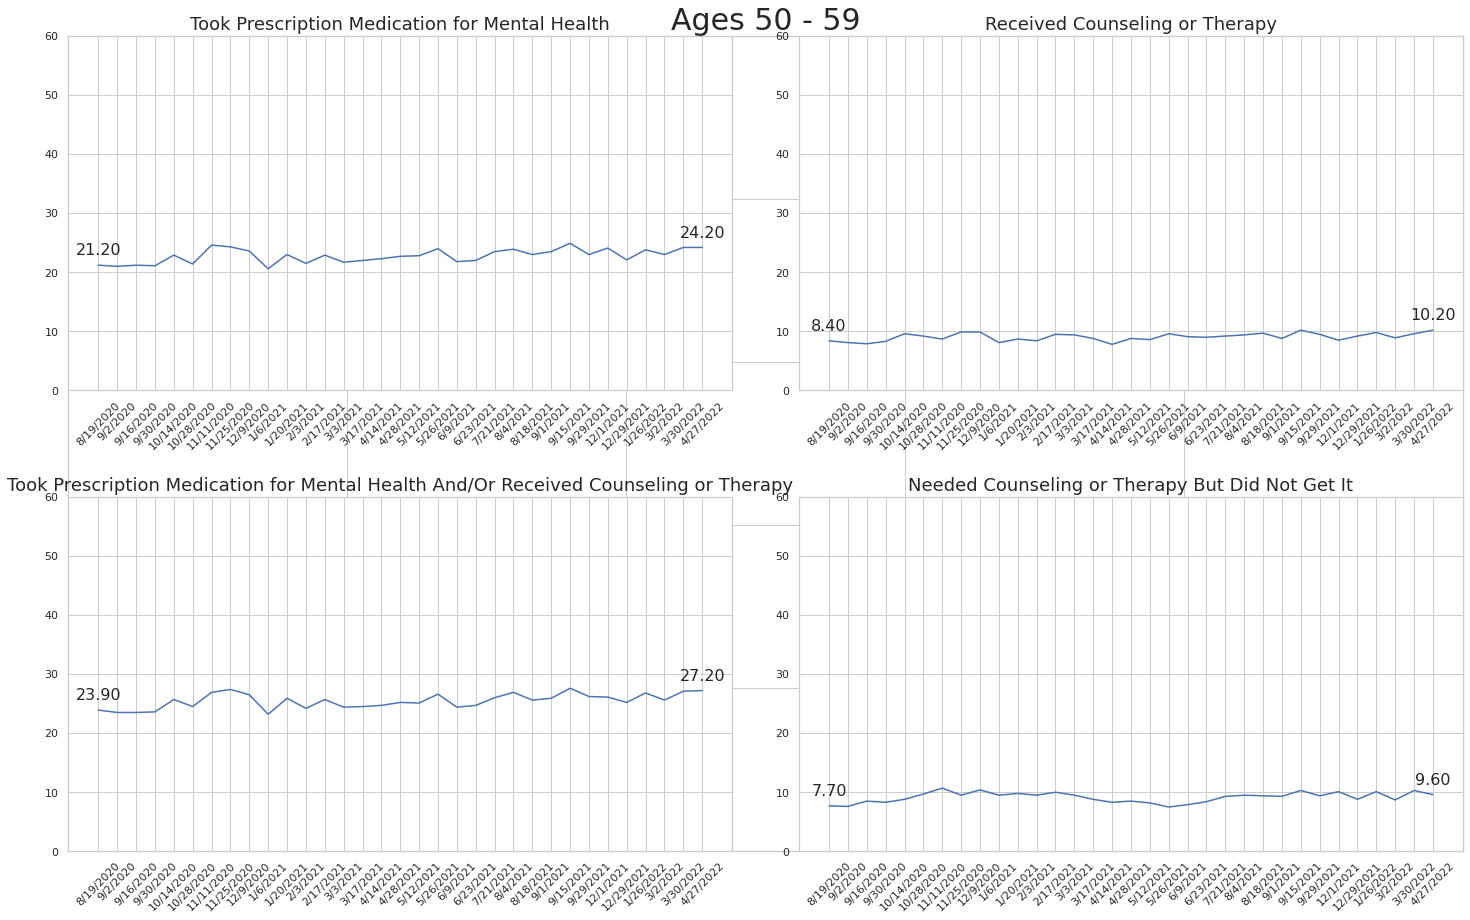

In [95]:
# Ages 50 - 59
topleft = sk_age_50_59[sk_age_50_59['Indicator'] == 'Took Prescription Medication for Mental Health, Last 4 Weeks']
topright = sk_age_50_59[sk_age_50_59['Indicator'] == 'Received Counseling or Therapy, Last 4 Weeks']
bottomleft = sk_age_50_59[sk_age_50_59['Indicator'] == 'Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks']
bottomright = sk_age_50_59[sk_age_50_59['Indicator'] =='Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks']

fig = plt.figure(figsize = (25, 15));
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False);

plt.title("Ages 50 - 59", fontsize = 30);
ax1 = fig.add_subplot(221);
ax2 = fig.add_subplot(222);
ax3 = fig.add_subplot(223);
ax4 = fig.add_subplot(224);
ax1.set_title('Took Prescription Medication for Mental Health', fontsize=18);
ax2.set_title('Received Counseling or Therapy', fontsize=18);
ax3.set_title('Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy', fontsize=18);
ax4.set_title('Needed Counseling or Therapy But Did Not Get It', fontsize=18);

plt.subplots_adjust(hspace=0.3, wspace = 0.1);

ax1.plot(topleft['Time Period Start Date'], topleft['Value']);
ax1.set_xticklabels(topleft['Time Period Start Date'], rotation=45);
ax1.set_ylim(0, 60);
temp = topleft[(topleft['Time Period'] == topleft['Time Period'].min()) | (topleft['Time Period'] == topleft['Time Period'].max())]
for x,y in zip(temp['Time Period Start Date'],temp['Value']):
    
    label = "{:.2f}".format(y)

    ax1.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',
                fontsize = 16)

ax2.plot(topright['Time Period Start Date'], topright['Value']);
ax2.set_xticklabels(topright['Time Period Start Date'], rotation=45);
ax2.set_ylim(0, 60);
temp = topright[(topright['Time Period'] == topright['Time Period'].min()) | (topright['Time Period'] == topright['Time Period'].max())]
for x,y in zip(temp['Time Period Start Date'],temp['Value']):
    
    label = "{:.2f}".format(y)

    ax2.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',
                fontsize = 16)

ax3.plot(bottomleft['Time Period Start Date'], bottomleft['Value']);
ax3.set_xticklabels(bottomleft['Time Period Start Date'], rotation=45);
ax3.set_ylim(0, 60);
temp = bottomleft[(bottomleft['Time Period'] == bottomleft['Time Period'].min()) | (bottomleft['Time Period'] == bottomleft['Time Period'].max())]
for x,y in zip(temp['Time Period Start Date'],temp['Value']):
    
    label = "{:.2f}".format(y)

    ax3.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',
                fontsize = 16)

ax4.plot(bottomright['Time Period Start Date'], bottomright['Value']);
ax4.set_xticklabels(bottomright['Time Period Start Date'], rotation=45);
ax4.set_ylim(0, 60);
temp = bottomright[(bottomright['Time Period'] == bottomright['Time Period'].min()) | (bottomright['Time Period'] == bottomright['Time Period'].max())]
for x,y in zip(temp['Time Period Start Date'],temp['Value']):
    
    label = "{:.2f}".format(y)

    ax4.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',
                fontsize = 16)

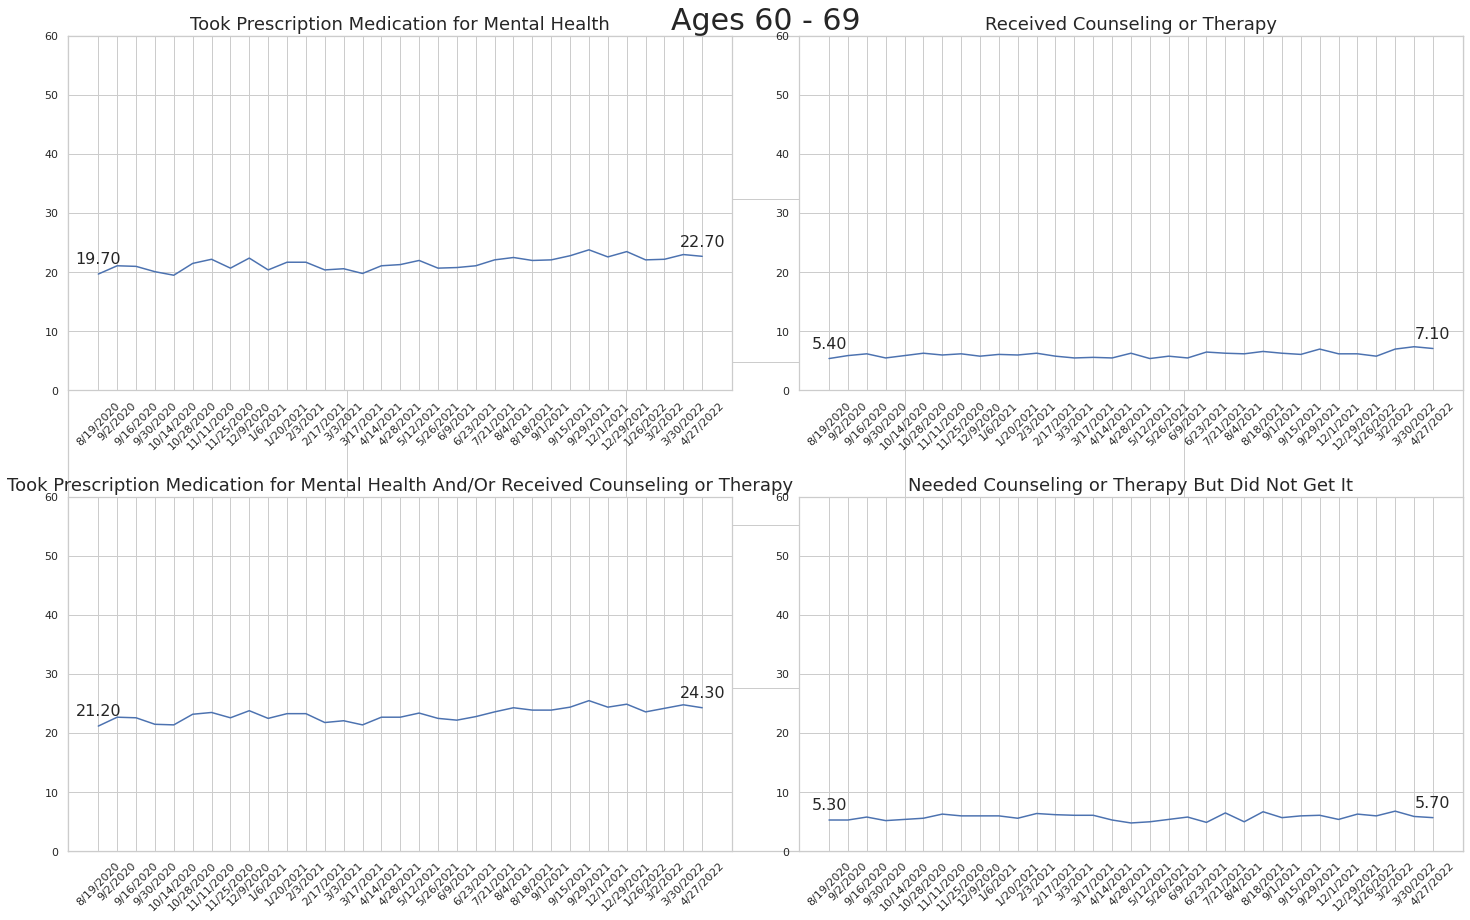

In [96]:
# Ages 60 - 69
topleft = sk_age_60_69[sk_age_60_69['Indicator'] == 'Took Prescription Medication for Mental Health, Last 4 Weeks']
topright = sk_age_60_69[sk_age_60_69['Indicator'] == 'Received Counseling or Therapy, Last 4 Weeks']
bottomleft = sk_age_60_69[sk_age_60_69['Indicator'] == 'Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks']
bottomright = sk_age_60_69[sk_age_60_69['Indicator'] =='Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks']

fig = plt.figure(figsize = (25, 15));
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False);

plt.title("Ages 60 - 69", fontsize = 30);
ax1 = fig.add_subplot(221);
ax2 = fig.add_subplot(222);
ax3 = fig.add_subplot(223);
ax4 = fig.add_subplot(224);
ax1.set_title('Took Prescription Medication for Mental Health', fontsize=18);
ax2.set_title('Received Counseling or Therapy', fontsize=18);
ax3.set_title('Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy', fontsize=18);
ax4.set_title('Needed Counseling or Therapy But Did Not Get It', fontsize=18);

plt.subplots_adjust(hspace=0.3, wspace = 0.1);

ax1.plot(topleft['Time Period Start Date'], topleft['Value']);
ax1.set_xticklabels(topleft['Time Period Start Date'], rotation=45);
ax1.set_ylim(0, 60);
temp = topleft[(topleft['Time Period'] == topleft['Time Period'].min()) | (topleft['Time Period'] == topleft['Time Period'].max())]
for x,y in zip(temp['Time Period Start Date'],temp['Value']):
    
    label = "{:.2f}".format(y)

    ax1.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',
                fontsize = 16)

ax2.plot(topright['Time Period Start Date'], topright['Value']);
ax2.set_xticklabels(topright['Time Period Start Date'], rotation=45);
ax2.set_ylim(0, 60);
temp = topright[(topright['Time Period'] == topright['Time Period'].min()) | (topright['Time Period'] == topright['Time Period'].max())]
for x,y in zip(temp['Time Period Start Date'],temp['Value']):
    
    label = "{:.2f}".format(y)

    ax2.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',
                fontsize = 16)

ax3.plot(bottomleft['Time Period Start Date'], bottomleft['Value']);
ax3.set_xticklabels(bottomleft['Time Period Start Date'], rotation=45);
ax3.set_ylim(0, 60);
temp = bottomleft[(bottomleft['Time Period'] == bottomleft['Time Period'].min()) | (bottomleft['Time Period'] == bottomleft['Time Period'].max())]
for x,y in zip(temp['Time Period Start Date'],temp['Value']):
    
    label = "{:.2f}".format(y)

    ax3.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',
                fontsize = 16)

ax4.plot(bottomright['Time Period Start Date'], bottomright['Value']);
ax4.set_xticklabels(bottomright['Time Period Start Date'], rotation=45);
ax4.set_ylim(0, 60);
temp = bottomright[(bottomright['Time Period'] == bottomright['Time Period'].min()) | (bottomright['Time Period'] == bottomright['Time Period'].max())]
for x,y in zip(temp['Time Period Start Date'],temp['Value']):
    
    label = "{:.2f}".format(y)

    ax4.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',
                fontsize = 16)

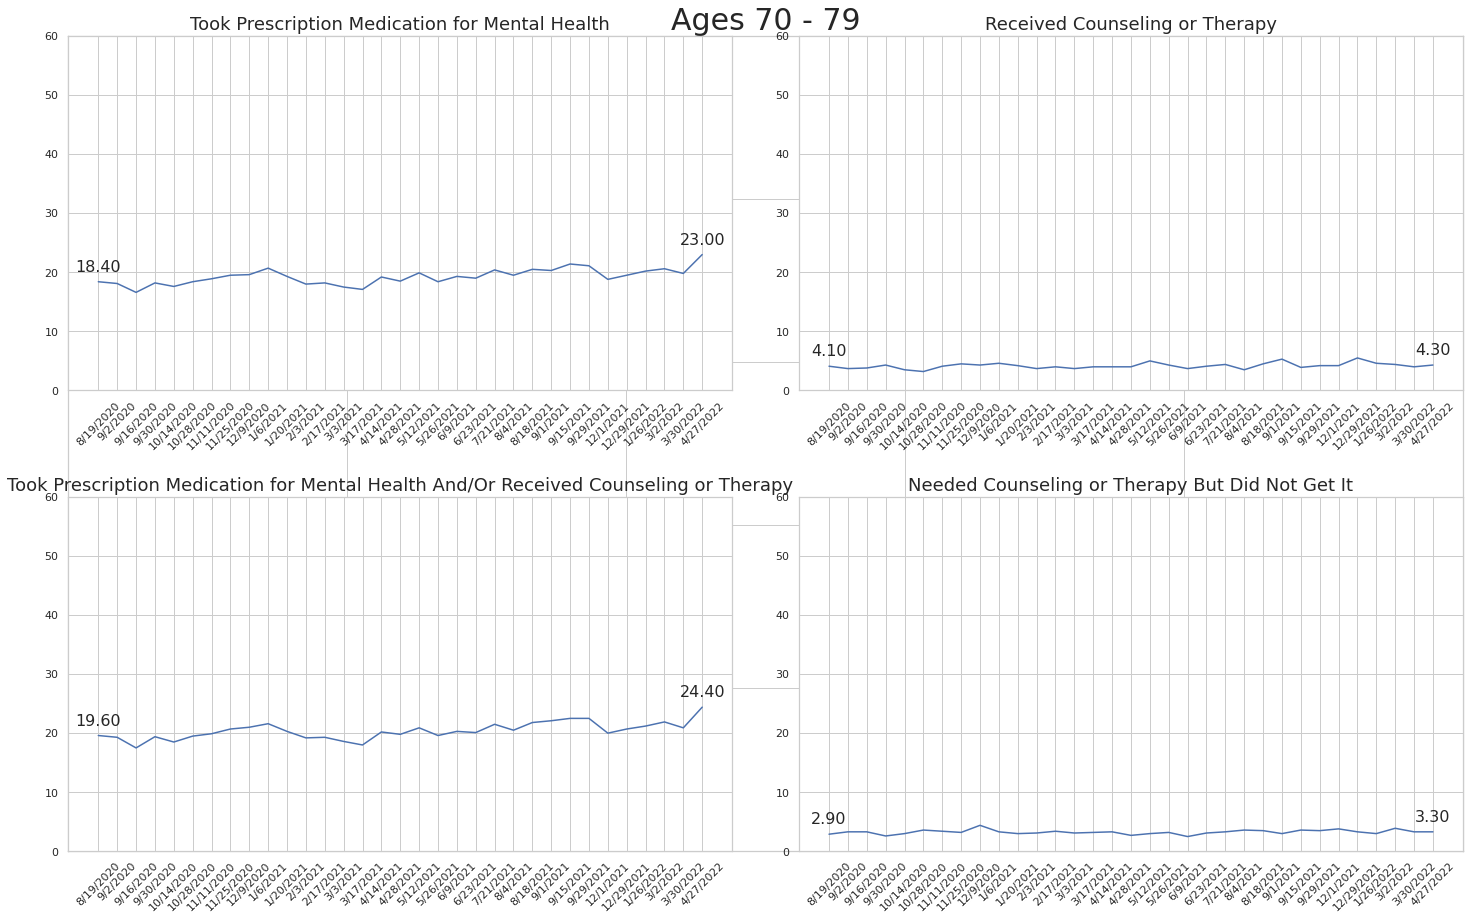

In [97]:
# Ages 70 - 79
topleft = sk_age_70_79[sk_age_70_79['Indicator'] == 'Took Prescription Medication for Mental Health, Last 4 Weeks']
topright = sk_age_70_79[sk_age_70_79['Indicator'] == 'Received Counseling or Therapy, Last 4 Weeks']
bottomleft = sk_age_70_79[sk_age_70_79['Indicator'] == 'Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks']
bottomright = sk_age_70_79[sk_age_70_79['Indicator'] =='Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks']

fig = plt.figure(figsize = (25, 15));
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False);

plt.title("Ages 70 - 79", fontsize = 30);
ax1 = fig.add_subplot(221);
ax2 = fig.add_subplot(222);
ax3 = fig.add_subplot(223);
ax4 = fig.add_subplot(224);
ax1.set_title('Took Prescription Medication for Mental Health', fontsize=18);
ax2.set_title('Received Counseling or Therapy', fontsize=18);
ax3.set_title('Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy', fontsize=18);
ax4.set_title('Needed Counseling or Therapy But Did Not Get It', fontsize=18);

plt.subplots_adjust(hspace=0.3, wspace = 0.1);

ax1.plot(topleft['Time Period Start Date'], topleft['Value']);
ax1.set_xticklabels(topleft['Time Period Start Date'], rotation=45);
ax1.set_ylim(0, 60);
temp = topleft[(topleft['Time Period'] == topleft['Time Period'].min()) | (topleft['Time Period'] == topleft['Time Period'].max())]
for x,y in zip(temp['Time Period Start Date'],temp['Value']):
    
    label = "{:.2f}".format(y)

    ax1.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',
                fontsize = 16)

ax2.plot(topright['Time Period Start Date'], topright['Value']);
ax2.set_xticklabels(topright['Time Period Start Date'], rotation=45);
ax2.set_ylim(0, 60);
temp = topright[(topright['Time Period'] == topright['Time Period'].min()) | (topright['Time Period'] == topright['Time Period'].max())]
for x,y in zip(temp['Time Period Start Date'],temp['Value']):
    
    label = "{:.2f}".format(y)

    ax2.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',
                fontsize = 16)

ax3.plot(bottomleft['Time Period Start Date'], bottomleft['Value']);
ax3.set_xticklabels(bottomleft['Time Period Start Date'], rotation=45);
ax3.set_ylim(0, 60);
temp = bottomleft[(bottomleft['Time Period'] == bottomleft['Time Period'].min()) | (bottomleft['Time Period'] == bottomleft['Time Period'].max())]
for x,y in zip(temp['Time Period Start Date'],temp['Value']):
    
    label = "{:.2f}".format(y)

    ax3.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',
                fontsize = 16)

ax4.plot(bottomright['Time Period Start Date'], bottomright['Value']);
ax4.set_xticklabels(bottomright['Time Period Start Date'], rotation=45);
ax4.set_ylim(0, 60);
temp = bottomright[(bottomright['Time Period'] == bottomright['Time Period'].min()) | (bottomright['Time Period'] == bottomright['Time Period'].max())]
for x,y in zip(temp['Time Period Start Date'],temp['Value']):
    
    label = "{:.2f}".format(y)

    ax4.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',
                fontsize = 16)


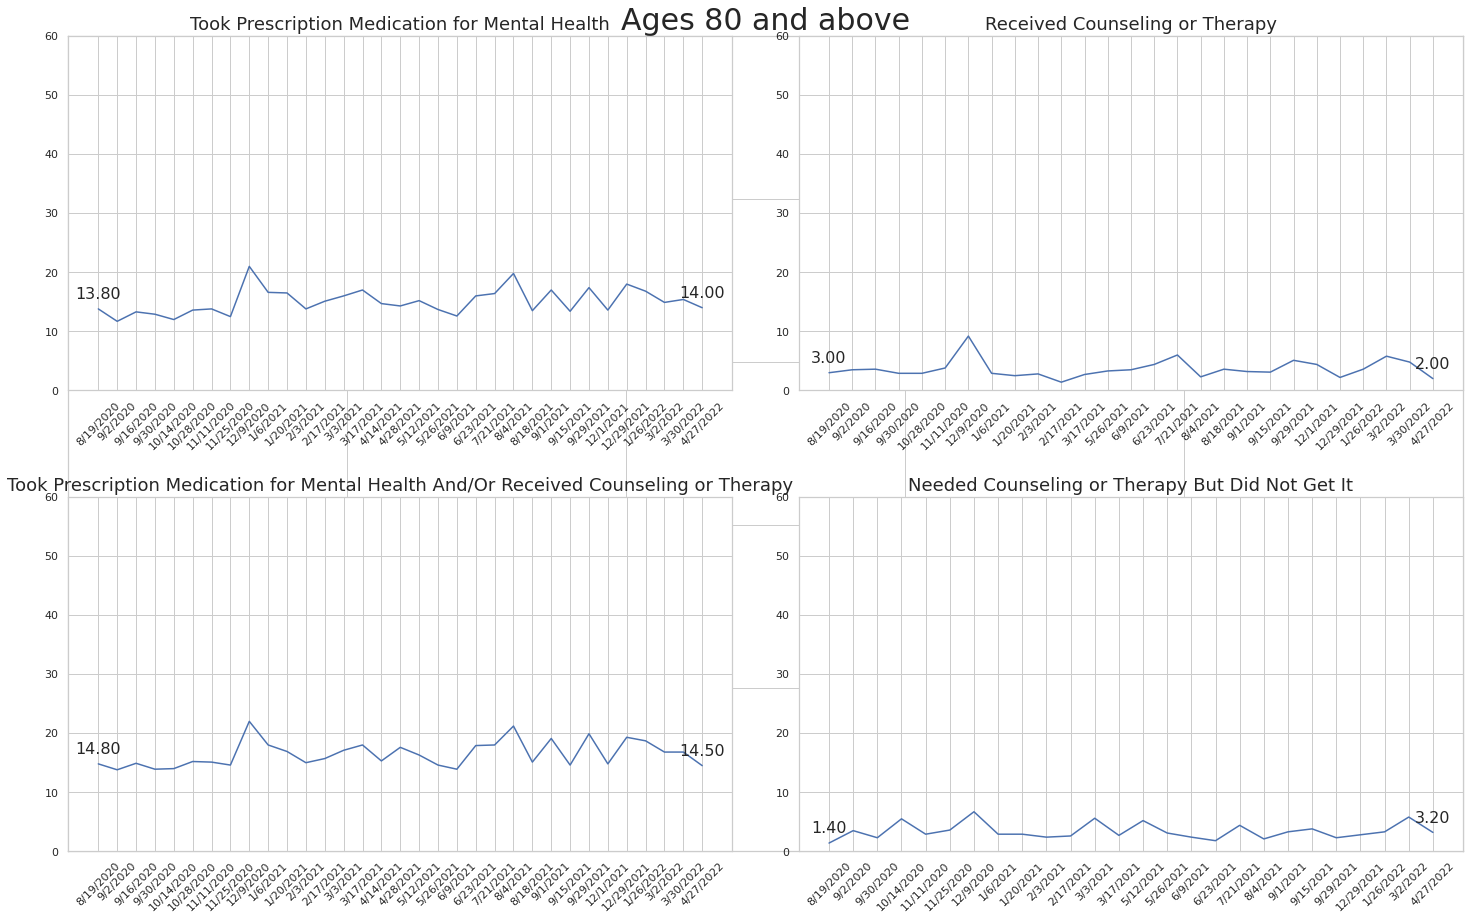

In [98]:
# Ages 80 and above
topleft = sk_age_80_above[sk_age_80_above['Indicator'] == 'Took Prescription Medication for Mental Health, Last 4 Weeks']
topright = sk_age_80_above[sk_age_80_above['Indicator'] == 'Received Counseling or Therapy, Last 4 Weeks']
bottomleft = sk_age_80_above[sk_age_80_above['Indicator'] == 'Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks']
bottomright = sk_age_80_above[sk_age_80_above['Indicator'] =='Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks']

fig = plt.figure(figsize = (25, 15));
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False);

plt.title("Ages 80 and above", fontsize = 30);
ax1 = fig.add_subplot(221);
ax2 = fig.add_subplot(222);
ax3 = fig.add_subplot(223);
ax4 = fig.add_subplot(224);
ax1.set_title('Took Prescription Medication for Mental Health', fontsize=18);
ax2.set_title('Received Counseling or Therapy', fontsize=18);
ax3.set_title('Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy', fontsize=18);
ax4.set_title('Needed Counseling or Therapy But Did Not Get It', fontsize=18);

plt.subplots_adjust(hspace=0.3, wspace = 0.1);

ax1.plot(topleft['Time Period Start Date'], topleft['Value']);
ax1.set_xticklabels(topleft['Time Period Start Date'], rotation=45);
ax1.set_ylim(0, 60);
temp = topleft[(topleft['Time Period'] == topleft['Time Period'].min()) | (topleft['Time Period'] == topleft['Time Period'].max())]
for x,y in zip(temp['Time Period Start Date'],temp['Value']):
    
    label = "{:.2f}".format(y)

    ax1.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',
                fontsize = 16)

ax2.plot(topright['Time Period Start Date'], topright['Value']);
ax2.set_xticklabels(topright['Time Period Start Date'], rotation=45);
ax2.set_ylim(0, 60);
temp = topright[(topright['Time Period'] == topright['Time Period'].min()) | (topright['Time Period'] == topright['Time Period'].max())]
for x,y in zip(temp['Time Period Start Date'],temp['Value']):
    
    label = "{:.2f}".format(y)

    ax2.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',
                fontsize = 16)

ax3.plot(bottomleft['Time Period Start Date'], bottomleft['Value']);
ax3.set_xticklabels(bottomleft['Time Period Start Date'], rotation=45);
ax3.set_ylim(0, 60);
temp = bottomleft[(bottomleft['Time Period'] == bottomleft['Time Period'].min()) | (bottomleft['Time Period'] == bottomleft['Time Period'].max())]
for x,y in zip(temp['Time Period Start Date'],temp['Value']):
    
    label = "{:.2f}".format(y)

    ax3.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',
                fontsize = 16)

ax4.plot(bottomright['Time Period Start Date'], bottomright['Value']);
ax4.set_xticklabels(bottomright['Time Period Start Date'], rotation=45);
ax4.set_ylim(0, 60);
temp = bottomright[(bottomright['Time Period'] == bottomright['Time Period'].min()) | (bottomright['Time Period'] == bottomright['Time Period'].max())]
for x,y in zip(temp['Time Period Start Date'],temp['Value']):
    
    label = "{:.2f}".format(y)

    ax4.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',
                fontsize = 16)

In [101]:
# Prescription Medication
sk_mental_health_prescription = sk_mental_health[(sk_mental_health['Indicator'] == 'Took Prescription Medication for Mental Health, Last 4 Weeks') & (sk_mental_health['Group'] == 'By Age')]
sk_mental_health_therapy = sk_mental_health[(sk_mental_health['Indicator'] == 'Received Counseling or Therapy, Last 4 Weeks') & (sk_mental_health['Group'] == 'By Age')]
sk_mental_health_prescription_therapy = sk_mental_health[(sk_mental_health['Indicator'] == 'Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks') & (sk_mental_health['Group'] == 'By Age')]
sk_mental_health_no_therapy = sk_mental_health[(sk_mental_health['Indicator'] =='Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks') & (sk_mental_health['Group'] == 'By Age')]


print('Took Prescription Medication for Mental Health:')
sk_mental_health_prescription['Year'] = pd.DatetimeIndex(sk_mental_health_prescription['Time Period Start Date']).year
display(sk_mental_health_prescription[['Subgroup', 'Year', 'Value', 'LowCI', 'HighCI']].groupby(['Subgroup', 'Year']).mean())

print('Received Counseling or Therapy:')
sk_mental_health_therapy['Year'] = pd.DatetimeIndex(sk_mental_health_therapy['Time Period Start Date']).year
display(sk_mental_health_therapy[['Subgroup', 'Year', 'Value', 'LowCI', 'HighCI']].groupby(['Subgroup', 'Year']).mean())

print('Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy:')
sk_mental_health_prescription_therapy['Year'] = pd.DatetimeIndex(sk_mental_health_prescription_therapy['Time Period Start Date']).year
display(sk_mental_health_prescription_therapy[['Subgroup', 'Year', 'Value', 'LowCI', 'HighCI']].groupby(['Subgroup', 'Year']).mean())

print('Needed Counseling or Therapy But Did Not Get It:')
sk_mental_health_no_therapy['Year'] = pd.DatetimeIndex(sk_mental_health_no_therapy['Time Period Start Date']).year
display(sk_mental_health_no_therapy[['Subgroup', 'Year', 'Value', 'LowCI', 'HighCI']].groupby(['Subgroup', 'Year']).mean())

Took Prescription Medication for Mental Health:


Value      LowCI     HighCI
Subgroup           Year                                 
18 - 29 years      2020  19.322222  17.511111  21.233333
                   2021  21.275000  19.205000  23.460000
                   2022  24.075000  21.825000  26.475000
30 - 39 years      2020  20.600000  19.355556  21.855556
                   2021  21.715000  20.310000  23.210000
                   2022  23.125000  21.525000  24.800000
40 - 49 years      2020  21.177778  20.077778  22.322222
                   2021  22.435000  21.025000  23.870000
                   2022  22.775000  21.425000  24.200000
50 - 59 years      2020  22.366667  21.044444  23.744444
                   2021  22.765000  21.425000  24.155000
                   2022  23.800000  22.450000  25.175000
60 - 69 years      2020  20.911111  19.711111  22.155556
                   2021  21.650000  20.385000  22.970000
                   2022  22.500000  21.275000  23.725000
70 - 79 years      2020  18.366667  16.700000  20.111111
                   2021  19.330000  17.660000  21.100000
                   2022  20.900000  19.175000  22.725000
80 years and above 2020  13.844444  10.566667  17.722222
                   2021  15.530000  12.065000  19.565000
                   2022  15.275000  12.350000  18.725000

Received Counseling or Therapy:


Value      LowCI     HighCI
Subgroup           Year                                 
18 - 29 years      2020  13.322222  11.877778  14.877778
                   2021  15.705000  13.930000  17.615000
                   2022  17.250000  15.350000  19.325000
30 - 39 years      2020  13.455556  12.433333  14.600000
                   2021  14.610000  13.440000  15.830000
                   2022  16.000000  14.825000  17.175000
40 - 49 years      2020  10.844444  10.000000  11.755556
                   2021  11.560000  10.555000  12.605000
                   2022  12.075000  11.100000  13.075000
50 - 59 years      2020   8.888889   8.011111   9.822222
                   2021   9.015000   8.120000   9.990000
                   2022   9.625000   8.700000  10.625000
60 - 69 years      2020   5.911111   5.188889   6.700000
                   2021   6.060000   5.395000   6.795000
                   2022   6.825000   6.075000   7.625000
70 - 79 years      2020   3.944444   3.222222   4.766667
                   2021   4.240000   3.425000   5.205000
                   2022   4.325000   3.575000   5.150000
80 years and above 2020   4.128571   2.471429   6.442857
                   2021   3.337500   1.975000   5.212500
                   2022   4.050000   2.325000   6.600000

Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy:


Value      LowCI     HighCI
Subgroup           Year                                 
18 - 29 years      2020  24.344444  22.377778  26.388889
                   2021  27.380000  25.155000  29.685000
                   2022  30.450000  27.950000  33.050000
30 - 39 years      2020  25.800000  24.455556  27.177778
                   2021  27.415000  25.855000  29.015000
                   2022  29.125000  27.425000  30.900000
40 - 49 years      2020  24.922222  23.744444  26.155556
                   2021  26.280000  24.775000  27.790000
                   2022  26.750000  25.325000  28.225000
50 - 59 years      2020  25.055556  23.666667  26.477778
                   2021  25.405000  24.005000  26.810000
                   2022  26.675000  25.300000  28.100000
60 - 69 years      2020  22.500000  21.255556  23.744444
                   2021  23.280000  21.980000  24.620000
                   2022  24.225000  22.975000  25.525000
70 - 79 years      2020  19.488889  17.822222  21.244444
                   2021  20.475000  18.750000  22.290000
                   2022  22.100000  20.350000  23.925000
80 years and above 2020  15.366667  11.733333  19.577778
                   2021  16.915000  13.300000  21.065000
                   2022  16.700000  13.500000  20.275000

Needed Counseling or Therapy But Did Not Get It:


Value      LowCI     HighCI
Subgroup           Year                                 
18 - 29 years      2020  18.811111  17.144444  20.544444
                   2021  20.175000  18.130000  22.340000
                   2022  20.550000  18.275000  23.050000
30 - 39 years      2020  15.166667  14.022222  16.411111
                   2021  15.580000  14.305000  16.940000
                   2022  16.400000  15.075000  17.775000
40 - 49 years      2020  11.533333  10.577778  12.611111
                   2021  11.870000  10.795000  12.985000
                   2022  12.425000  11.325000  13.550000
50 - 59 years      2020   9.022222   8.111111  10.022222
                   2021   9.100000   8.170000  10.095000
                   2022   9.675000   8.650000  10.875000
60 - 69 years      2020   5.655556   4.966667   6.433333
                   2021   5.765000   5.070000   6.525000
                   2022   6.100000   5.450000   6.850000
70 - 79 years      2020   3.300000   2.600000   4.100000
                   2021   3.225000   2.540000   4.085000
                   2022   3.375000   2.550000   4.375000
80 years and above 2020   3.700000   1.971429   6.300000
                   2021   3.143750   1.675000   5.337500
                   2022   4.100000   2.333333   6.700000

In [102]:
sk_age = sk_mental_health[sk_mental_health['Group'] == 'By Age']
sk_age['Year'] = pd.DatetimeIndex(sk_age['Time Period Start Date']).year


sk_mental_health_prescription = sk_age[(sk_age['Indicator'] == 'Took Prescription Medication for Mental Health, Last 4 Weeks')].groupby(['Year', 'Subgroup']).mean().reset_index()
sk_mental_health_therapy = sk_age[(sk_age['Indicator'] == 'Received Counseling or Therapy, Last 4 Weeks')].groupby(['Year', 'Subgroup']).mean().reset_index()
sk_mental_health_prescription_therapy = sk_age[(sk_age['Indicator'] == 'Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks')].groupby(['Year', 'Subgroup']).mean().reset_index()
sk_mental_health_no_therapy = sk_age[(sk_age['Indicator'] =='Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks')].groupby(['Year', 'Subgroup']).mean().reset_index()


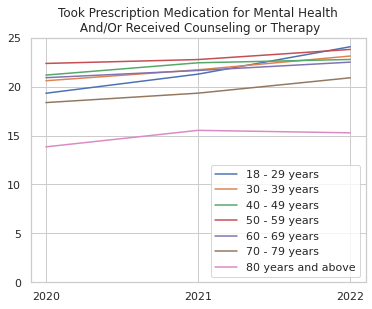

In [103]:
plt.figure(figsize = (6, 4.5))
plt.plot(sk_mental_health_prescription.loc[sk_mental_health_prescription['Subgroup'] == '18 - 29 years', 'Year'], sk_mental_health_prescription.loc[sk_mental_health_prescription['Subgroup'] == '18 - 29 years', 'Value'], label = '18 - 29 years');
plt.plot(sk_mental_health_prescription.loc[sk_mental_health_prescription['Subgroup'] == '30 - 39 years', 'Year'], sk_mental_health_prescription.loc[sk_mental_health_prescription['Subgroup'] == '30 - 39 years', 'Value'], label = '30 - 39 years');
plt.plot(sk_mental_health_prescription.loc[sk_mental_health_prescription['Subgroup'] == '40 - 49 years', 'Year'], sk_mental_health_prescription.loc[sk_mental_health_prescription['Subgroup'] == '40 - 49 years', 'Value'], label = '40 - 49 years');
plt.plot(sk_mental_health_prescription.loc[sk_mental_health_prescription['Subgroup'] == '50 - 59 years', 'Year'], sk_mental_health_prescription.loc[sk_mental_health_prescription['Subgroup'] == '50 - 59 years', 'Value'], label = '50 - 59 years');
plt.plot(sk_mental_health_prescription.loc[sk_mental_health_prescription['Subgroup'] == '60 - 69 years', 'Year'], sk_mental_health_prescription.loc[sk_mental_health_prescription['Subgroup'] == '60 - 69 years', 'Value'], label = '60 - 69 years');
plt.plot(sk_mental_health_prescription.loc[sk_mental_health_prescription['Subgroup'] == '70 - 79 years', 'Year'], sk_mental_health_prescription.loc[sk_mental_health_prescription['Subgroup'] == '70 - 79 years', 'Value'], label = '70 - 79 years');
plt.plot(sk_mental_health_prescription.loc[sk_mental_health_prescription['Subgroup'] == '80 years and above', 'Year'], sk_mental_health_prescription.loc[sk_mental_health_prescription['Subgroup'] == '80 years and above', 'Value'], label = '80 years and above');


plt.legend(loc='lower right');
plt.locator_params(axis="x", integer=True, tight=True)
plt.ylim(0, 25)
plt.title('Took Prescription Medication for Mental Health\n And/Or Received Counseling or Therapy');

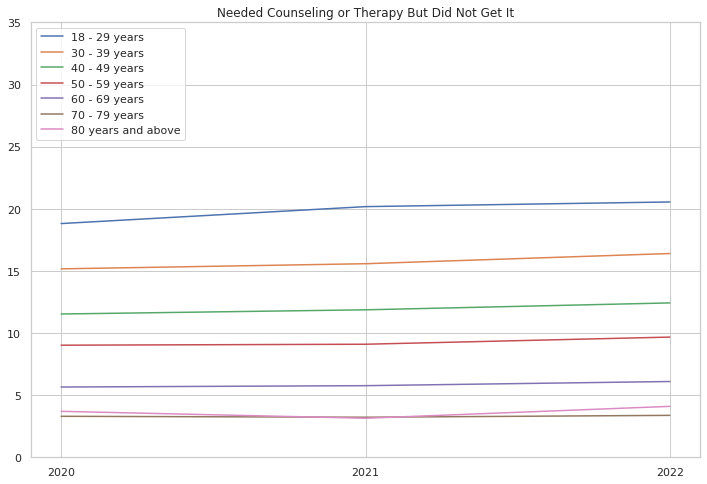

In [104]:
plt.figure(figsize = (12, 8))
plt.plot(sk_mental_health_no_therapy.loc[sk_mental_health_no_therapy['Subgroup'] == '18 - 29 years', 'Year'], sk_mental_health_no_therapy.loc[sk_mental_health_no_therapy['Subgroup'] == '18 - 29 years', 'Value'], label = '18 - 29 years');
plt.plot(sk_mental_health_no_therapy.loc[sk_mental_health_no_therapy['Subgroup'] == '30 - 39 years', 'Year'], sk_mental_health_no_therapy.loc[sk_mental_health_no_therapy['Subgroup'] == '30 - 39 years', 'Value'], label = '30 - 39 years');
plt.plot(sk_mental_health_no_therapy.loc[sk_mental_health_no_therapy['Subgroup'] == '40 - 49 years', 'Year'], sk_mental_health_no_therapy.loc[sk_mental_health_no_therapy['Subgroup'] == '40 - 49 years', 'Value'], label = '40 - 49 years');
plt.plot(sk_mental_health_no_therapy.loc[sk_mental_health_no_therapy['Subgroup'] == '50 - 59 years', 'Year'], sk_mental_health_no_therapy.loc[sk_mental_health_no_therapy['Subgroup'] == '50 - 59 years', 'Value'], label = '50 - 59 years');
plt.plot(sk_mental_health_no_therapy.loc[sk_mental_health_no_therapy['Subgroup'] == '60 - 69 years', 'Year'], sk_mental_health_no_therapy.loc[sk_mental_health_no_therapy['Subgroup'] == '60 - 69 years', 'Value'], label = '60 - 69 years');
plt.plot(sk_mental_health_no_therapy.loc[sk_mental_health_no_therapy['Subgroup'] == '70 - 79 years', 'Year'], sk_mental_health_no_therapy.loc[sk_mental_health_no_therapy['Subgroup'] == '70 - 79 years', 'Value'], label = '70 - 79 years');
plt.plot(sk_mental_health_no_therapy.loc[sk_mental_health_no_therapy['Subgroup'] == '80 years and above', 'Year'], sk_mental_health_no_therapy.loc[sk_mental_health_no_therapy['Subgroup'] == '80 years and above', 'Value'], label = '80 years and above');


plt.legend(loc='upper left');
plt.locator_params(axis="x", integer=True, tight=True)
plt.ylim(0, 35)
plt.title('Needed Counseling or Therapy But Did Not Get It');

In [105]:
sk_race = sk_mental_health[sk_mental_health['Group'] == 'By Race/Hispanic ethnicity']
sk_race['Year'] = pd.DatetimeIndex(sk_race['Time Period Start Date']).year


sk_mental_health_prescription = sk_race[(sk_race['Indicator'] == 'Took Prescription Medication for Mental Health, Last 4 Weeks')].groupby(['Year', 'Subgroup']).mean().reset_index()
sk_mental_health_therapy = sk_race[(sk_race['Indicator'] == 'Received Counseling or Therapy, Last 4 Weeks')].groupby(['Year', 'Subgroup']).mean().reset_index()
sk_mental_health_prescription_therapy = sk_race[(sk_race['Indicator'] == 'Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks')].groupby(['Year', 'Subgroup']).mean().reset_index()
sk_mental_health_no_therapy = sk_race[(sk_race['Indicator'] =='Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks')].groupby(['Year', 'Subgroup']).mean().reset_index()


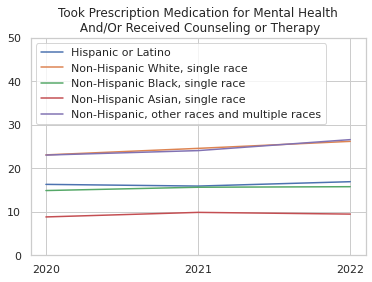

In [106]:
plt.figure(figsize = (6, 4))
plt.plot(sk_mental_health_prescription.loc[sk_mental_health_prescription['Subgroup'] == 'Hispanic or Latino', 'Year'], sk_mental_health_prescription.loc[sk_mental_health_prescription['Subgroup'] == 'Hispanic or Latino'].groupby('Year').mean()['Value'], label = 'Hispanic or Latino');
plt.plot(sk_mental_health_prescription.loc[sk_mental_health_prescription['Subgroup'] == 'Non-Hispanic White, single race', 'Year'], sk_mental_health_prescription.loc[sk_mental_health_prescription['Subgroup'] == 'Non-Hispanic White, single race'].groupby('Year').mean()['Value'], label = 'Non-Hispanic White, single race');
plt.plot(sk_mental_health_prescription.loc[sk_mental_health_prescription['Subgroup'] == 'Non-Hispanic Black, single race', 'Year'], sk_mental_health_prescription.loc[sk_mental_health_prescription['Subgroup'] == 'Non-Hispanic Black, single race'].groupby('Year').mean()['Value'], label = 'Non-Hispanic Black, single race');
plt.plot(sk_mental_health_prescription.loc[sk_mental_health_prescription['Subgroup'] == 'Non-Hispanic Asian, single race', 'Year'], sk_mental_health_prescription.loc[sk_mental_health_prescription['Subgroup'] == 'Non-Hispanic Asian, single race'].groupby('Year').mean()['Value'], label = 'Non-Hispanic Asian, single race');
plt.plot(sk_mental_health_prescription.loc[sk_mental_health_prescription['Subgroup'] == 'Non-Hispanic, other races and multiple races', 'Year'], sk_mental_health_prescription.loc[sk_mental_health_prescription['Subgroup'] == 'Non-Hispanic, other races and multiple races'].groupby('Year').mean()['Value'], label = 'Non-Hispanic, other races and multiple races');
plt.legend(loc='upper left');
plt.locator_params(axis="x", integer=True, tight=True)
plt.ylim(0, 50);
plt.title('Took Prescription Medication for Mental Health\n And/Or Received Counseling or Therapy');


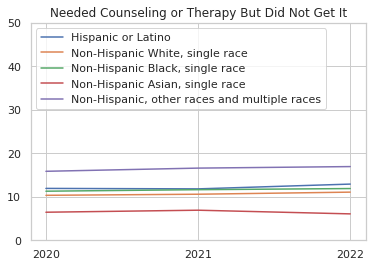

In [107]:
plt.figure(figsize = (6, 4))
plt.plot(sk_mental_health_no_therapy.loc[sk_mental_health_no_therapy['Subgroup'] == 'Hispanic or Latino', 'Year'], sk_mental_health_no_therapy.loc[sk_mental_health_no_therapy['Subgroup'] == 'Hispanic or Latino'].groupby('Year').mean()['Value'], label = 'Hispanic or Latino');
plt.plot(sk_mental_health_no_therapy.loc[sk_mental_health_no_therapy['Subgroup'] == 'Non-Hispanic White, single race', 'Year'], sk_mental_health_no_therapy.loc[sk_mental_health_no_therapy['Subgroup'] == 'Non-Hispanic White, single race'].groupby('Year').mean()['Value'], label = 'Non-Hispanic White, single race');
plt.plot(sk_mental_health_no_therapy.loc[sk_mental_health_no_therapy['Subgroup'] == 'Non-Hispanic Black, single race', 'Year'], sk_mental_health_no_therapy.loc[sk_mental_health_no_therapy['Subgroup'] == 'Non-Hispanic Black, single race'].groupby('Year').mean()['Value'], label = 'Non-Hispanic Black, single race');
plt.plot(sk_mental_health_no_therapy.loc[sk_mental_health_no_therapy['Subgroup'] == 'Non-Hispanic Asian, single race', 'Year'], sk_mental_health_no_therapy.loc[sk_mental_health_no_therapy['Subgroup'] == 'Non-Hispanic Asian, single race'].groupby('Year').mean()['Value'], label = 'Non-Hispanic Asian, single race');
plt.plot(sk_mental_health_no_therapy.loc[sk_mental_health_no_therapy['Subgroup'] == 'Non-Hispanic, other races and multiple races', 'Year'], sk_mental_health_no_therapy.loc[sk_mental_health_no_therapy['Subgroup'] == 'Non-Hispanic, other races and multiple races'].groupby('Year').mean()['Value'], label = 'Non-Hispanic, other races and multiple races');
plt.legend(loc='upper left');
plt.locator_params(axis="x", integer=True, tight=True);
plt.ylim(0, 50);
plt.title('Needed Counseling or Therapy But Did Not Get It');

In [108]:
sk_gender = sk_mental_health[sk_mental_health['Group'] == 'By Gender identity']
sk_gender['Year'] = pd.DatetimeIndex(sk_gender['Time Period Start Date']).year

sk_mental_health_prescription = sk_gender[(sk_gender['Indicator'] == 'Took Prescription Medication for Mental Health, Last 4 Weeks')].groupby(['Year', 'Subgroup']).mean().reset_index()
sk_mental_health_therapy = sk_gender[(sk_gender['Indicator'] == 'Received Counseling or Therapy, Last 4 Weeks')].groupby(['Year', 'Subgroup']).mean().reset_index()
sk_mental_health_prescription_therapy = sk_gender[(sk_gender['Indicator'] == 'Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks')].groupby(['Year', 'Subgroup']).mean().reset_index()
sk_mental_health_no_therapy = sk_gender[(sk_gender['Indicator'] =='Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks')].groupby(['Year', 'Subgroup']).mean().reset_index()


In [109]:
sk_mental_health_prescription_therapy

,Year,Subgroup,Time Period,Value,LowCI,HighCI,Suppression Flag
0,2021,Cis-gender female,37.5,31.8500,30.9875,32.7500,NaN
1,2021,Cis-gender male,37.5,18.5500,17.6375,19.5000,NaN
2,2021,Transgender,37.5,48.8125,37.4625,60.3125,NaN
3,2022,Cis-gender female,43.5,32.4750,31.5750,33.3750,NaN
4,2022,Cis-gender male,43.5,19.0500,18.0750,20.0500,NaN
5,2022,Transgender,43.5,52.1250,41.6500,62.4500,NaN


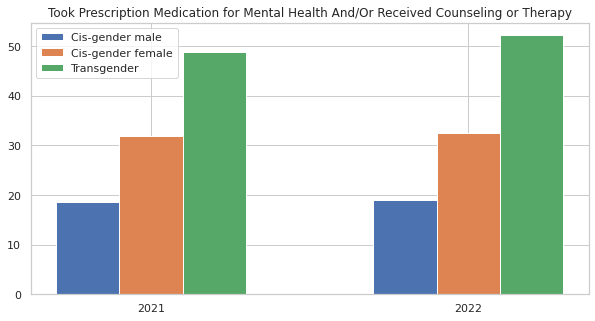

In [110]:
x = np.arange(2)

plt.figure(figsize = (10, 5))
plt.bar(x-0.2, sk_mental_health_prescription_therapy.loc[sk_mental_health_prescription_therapy['Subgroup'] == 'Cis-gender male'].groupby('Year').mean()['Value'], label = 'Cis-gender male', width = 0.2);
plt.bar(x, sk_mental_health_prescription_therapy.loc[sk_mental_health_prescription_therapy['Subgroup'] == 'Cis-gender female'].groupby('Year').mean()['Value'], label = 'Cis-gender female', width = 0.2);
plt.bar(x+0.2, sk_mental_health_prescription_therapy.loc[sk_mental_health_prescription_therapy['Subgroup'] == 'Transgender'].groupby('Year').mean()['Value'], label = 'Transgender', width = 0.2);

plt.xticks(x, [2021, 2022]);
plt.legend(loc='upper left');
plt.title('Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy');
wrap_labels(ax, 30)

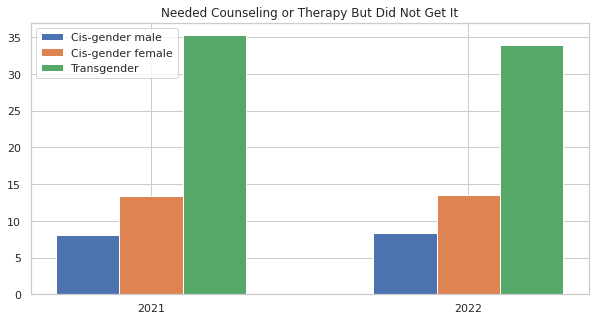

In [111]:
x = np.arange(2)
plt.figure(figsize = (10, 5))

plt.bar(x-0.2, sk_mental_health_no_therapy.loc[sk_mental_health_no_therapy['Subgroup'] == 'Cis-gender male'].groupby('Year').mean()['Value'], label = 'Cis-gender male', width = 0.2);
plt.bar(x, sk_mental_health_no_therapy.loc[sk_mental_health_no_therapy['Subgroup'] == 'Cis-gender female'].groupby('Year').mean()['Value'], label = 'Cis-gender female', width = 0.2);
plt.bar(x+0.2, sk_mental_health_no_therapy.loc[sk_mental_health_no_therapy['Subgroup'] == 'Transgender'].groupby('Year').mean()['Value'], label = 'Transgender', width = 0.2);

plt.xticks(x, [2021, 2022]);
plt.legend(loc='upper left');
plt.title('Needed Counseling or Therapy But Did Not Get It');

In [112]:
sk_sexuality = sk_mental_health[sk_mental_health['Group'] == 'By Sexual orientation']
sk_sexuality['Year'] = pd.DatetimeIndex(sk_sexuality['Time Period Start Date']).year

sk_mental_health_prescription = sk_sexuality[(sk_sexuality['Indicator'] == 'Took Prescription Medication for Mental Health, Last 4 Weeks')].groupby(['Year', 'Subgroup']).mean().reset_index()
sk_mental_health_therapy = sk_sexuality[(sk_sexuality['Indicator'] == 'Received Counseling or Therapy, Last 4 Weeks')].groupby(['Year', 'Subgroup']).mean().reset_index()
sk_mental_health_prescription_therapy = sk_sexuality[(sk_sexuality['Indicator'] == 'Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks')].groupby(['Year', 'Subgroup']).mean().reset_index()
sk_mental_health_no_therapy = sk_sexuality[(sk_sexuality['Indicator'] =='Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks')].groupby(['Year', 'Subgroup']).mean().reset_index()


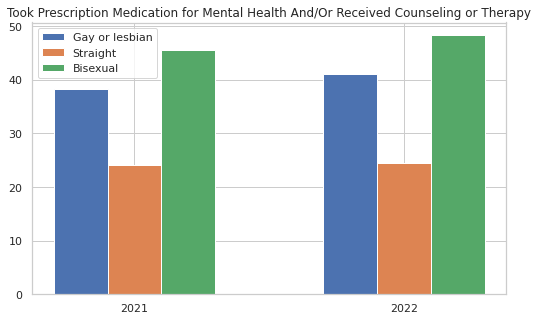

In [113]:
x = np.arange(2)
plt.figure(figsize = (8.5, 5))

plt.bar(x-0.2, sk_mental_health_prescription_therapy.loc[sk_mental_health_prescription_therapy['Subgroup'] == 'Gay or lesbian'].groupby('Year').mean()['Value'], label = 'Gay or lesbian', width = 0.2);
plt.bar(x, sk_mental_health_prescription_therapy.loc[sk_mental_health_prescription_therapy['Subgroup'] == 'Straight'].groupby('Year').mean()['Value'], label = 'Straight', width = 0.2);
plt.bar(x+0.2, sk_mental_health_prescription_therapy.loc[sk_mental_health_prescription_therapy['Subgroup'] == 'Bisexual'].groupby('Year').mean()['Value'], label = 'Bisexual', width = 0.2);

plt.xticks(x, [2021, 2022]);
plt.legend(loc='upper left');
plt.title('Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy');

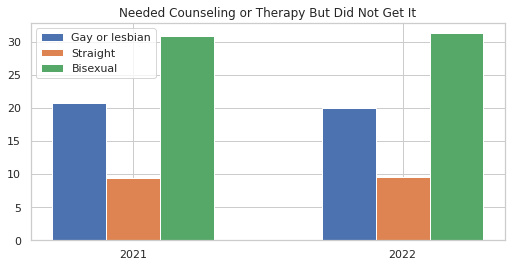

In [114]:
x = np.arange(2)
plt.figure(figsize = (8.5, 4))
plt.bar(x-0.2, sk_mental_health_no_therapy.loc[sk_mental_health_no_therapy['Subgroup'] == 'Gay or lesbian'].groupby('Year').mean()['Value'], label = 'Gay or lesbian', width = 0.2);
plt.bar(x, sk_mental_health_no_therapy.loc[sk_mental_health_no_therapy['Subgroup'] == 'Straight'].groupby('Year').mean()['Value'], label = 'Straight', width = 0.2);
plt.bar(x+0.2, sk_mental_health_no_therapy.loc[sk_mental_health_no_therapy['Subgroup'] == 'Bisexual'].groupby('Year').mean()['Value'], label = 'Bisexual', width = 0.2);

plt.xticks(x, [2021, 2022]);
plt.legend(loc='upper left');
plt.title('Needed Counseling or Therapy But Did Not Get It');

# Communites Impacted 
## By Education

In [115]:
ly_mhc_data = pd.read_csv('Mental_Health_Care_in_the_Last_4_Weeks.csv')
ly_npa_data = pd.read_csv('Nutrition__Physical_Activity.csv')
ly_rates = pd.read_csv('data-table.csv')

ly_2020_rates = ly_rates.loc[ly_rates['YEAR'] == 2020]
ly_2020_rates.head()

,YEAR,STATE,RATE,DEATHS,URL
0,2020,AL,16.0,793,/nchs/pressroom/states/alabama/al.htm
1,2020,AK,27.5,204,/nchs/pressroom/states/alaska/ak.htm
2,2020,AZ,17.6,1363,/nchs/pressroom/states/arizona/az.htm
3,2020,AR,19.0,583,/nchs/pressroom/states/arkansas/ar.htm
4,2020,CA,10.0,4144,/nchs/pressroom/states/california/ca.htm


In [116]:
state_to_code = {'Mississippi': 'MS', 'Oklahoma': 'OK',
                 'Delaware': 'DE', 'Minnesota': 'MN', 'Illinois': 'IL', 'Arkansas': 'AR',
                 'New Mexico': 'NM', 'Indiana': 'IN', 'Maryland': 'MD', 'Louisiana': 'LA',
                 'Idaho': 'ID', 'Wyoming': 'WY', 'Tennessee': 'TN', 'Arizona': 'AZ',
                 'Iowa': 'IA', 'Michigan': 'MI', 'Kansas': 'KS', 'Utah': 'UT',
                 'Virginia': 'VA', 'Oregon': 'OR', 'Connecticut': 'CT', 'Montana': 'MT',
                 'California': 'CA', 'Massachusetts': 'MA', 'West Virginia': 'WV',
                 'South Carolina': 'SC', 'New Hampshire': 'NH', 'Wisconsin': 'WI',
                 'Vermont': 'VT', 'Georgia': 'GA', 'North Dakota': 'ND',
                 'Pennsylvania': 'PA', 'Florida': 'FL', 'Alaska': 'AK', 'Kentucky': 'KY',
                 'Hawaii': 'HI', 'Nebraska': 'NE', 'Missouri': 'MO', 'Ohio': 'OH',
                 'Alabama': 'AL', 'Rhode Island': 'RI', 'South Dakota': 'SD',
                 'Colorado': 'CO', 'New Jersey': 'NJ', 'Washington': 'WA',
                 'North Carolina': 'NC', 'New York': 'NY', 'Texas': 'TX',
                 'Nevada': 'NV', 'Maine': 'ME', 'District of Columbia': 'DC'}

code_to_state = {code: state for state, code in state_to_code.items()}

ly_2020_rates['STATE'] = ly_2020_rates['STATE'].apply(lambda x : code_to_state[x])


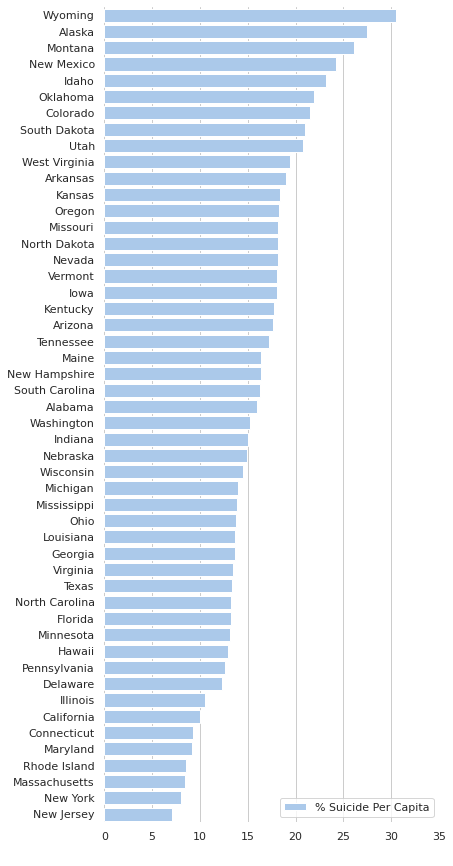

In [117]:
ly_2020_rates.sort_values(by='RATE', ascending=False, inplace=True)

sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the death rates

sns.set_color_codes("pastel")
sns.barplot(x="RATE", y="STATE", data=ly_2020_rates,
            label="% Suicide Per Capita", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 35), ylabel="",
        xlabel=" ")

sns.despine(left=True, bottom=True)


In [118]:
ly_worst5states = ly_2020_rates.iloc[:,[1,2,3]]
ly_worst5states.set_index('STATE', inplace = True)
ly_worst5states.head()


,RATE,DEATHS
STATE,,
Wyoming,30.5,182
Alaska,27.5,204
Montana,26.1,300
New Mexico,24.2,516
Idaho,23.2,419


In [119]:
#best states
ly_worst5states.tail()

,RATE,DEATHS
STATE,,
Maryland,9.2,585
Rhode Island,8.5,94
Massachusetts,8.4,618
New York,8.0,1642
New Jersey,7.1,679


In [120]:
ly_npa_data
ly_npa_data_clean = ly_npa_data.loc[(ly_npa_data['YearStart']<2019) & (ly_npa_data['YearStart']>2010)]

In [121]:
ly_npa_data_clean.head()
ly_ed = ly_npa_data_clean.iloc[:,[0,2,3,5,7,10]]
ly_ed



,YearStart,LocationAbbr,LocationDesc,Class,Question,Data_Value
5,2011,RI,Rhode Island,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,11.5
15,2017,VT,Vermont,Obesity / Weight Status,Percent of students in grades 9-12 who have an...,14.1
26,2013,SD,South Dakota,Television Viewing,Percent of students in grades 9-12 watching 3 ...,24.1
28,2015,ME,Maine,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,14.5
29,2017,GU,Guam,Obesity / Weight Status,Percent of students in grades 9-12 who have an...,20.9
...,...,...,...,...,...,...
40088,2015,WY,Wyoming,Fruits and Vegetables,Percent of students in grades 9-12 who consume...,NaN
40090,2015,RI,Rhode Island,Television Viewing,Percent of students in grades 9-12 watching 3 ...,24.9
40093,2011,NH,New Hampshire,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,NaN
40094,2011,AR,Arkansas,Fruits and Vegetables,Percent of students in grades 9-12 who consume...,50.0


In [122]:
ly_ed.groupby(by='Question').mean()

,YearStart,Data_Value
Question,,
Percent of students in grades 9-12 watching 3 or more hours of television each school day,2013.902439,26.613276
Percent of students in grades 9-12 who achieve 1 hour or more of moderate-and/or vigorous-intensity physical activity daily,2014.078788,24.566235
Percent of students in grades 9-12 who consume fruit less than 1 time daily,2013.970060,41.363704
Percent of students in grades 9-12 who consume vegetables less than 1 time daily,2013.950000,40.747235
Percent of students in grades 9-12 who drank regular soda/pop at least one time per day,2013.945455,21.420035
Percent of students in grades 9-12 who have an overweight classification,2013.953488,15.460195
Percent of students in grades 9-12 who have obesity,2013.953488,13.670416
Percent of students in grades 9-12 who participate in daily physical education,2013.924051,24.418440


In [123]:
ly_pe_cl = ly_ed.loc[ ly_ed['Question'] == 
                   'Percent of students in grades 9-12 who achieve 1 hour or more of moderate-and/or vigorous-intensity physical activity daily']

In [124]:
ly_pe_cl 

,YearStart,LocationAbbr,LocationDesc,Class,Question,Data_Value
81,2017,CT,Connecticut,Physical Activity,Percent of students in grades 9-12 who achieve...,22.3
147,2017,TN,Tennessee,Physical Activity,Percent of students in grades 9-12 who achieve...,27.6
158,2015,RI,Rhode Island,Physical Activity,Percent of students in grades 9-12 who achieve...,20.1
189,2013,ID,Idaho,Physical Activity,Percent of students in grades 9-12 who achieve...,27.9
249,2013,WV,West Virginia,Physical Activity,Percent of students in grades 9-12 who achieve...,NaN
...,...,...,...,...,...,...
40036,2015,SD,South Dakota,Physical Activity,Percent of students in grades 9-12 who achieve...,NaN
40052,2011,NC,North Carolina,Physical Activity,Percent of students in grades 9-12 who achieve...,20.4
40066,2013,WV,West Virginia,Physical Activity,Percent of students in grades 9-12 who achieve...,NaN
40067,2015,VT,Vermont,Physical Activity,Percent of students in grades 9-12 who achieve...,25.1


In [125]:
ly_pe_1 =ly_pe_cl.groupby(by='LocationAbbr').mean()
ly_pe_1.reset_index(inplace=True)
ly_pe_1.rename(columns = {'LocationAbbr':'STATE'}, inplace=True)
ly_pe_1.head()

ly_pe_1.STATE.unique()

ly_pe_1 = ly_pe_1[(ly_pe_1.STATE != 'DC') & (ly_pe_1.STATE != 'GU') & (ly_pe_1.STATE != 'PR') & (ly_pe_1.STATE != 'US')]
ly_pe_1['STATE'] = ly_pe_1['STATE'].apply(lambda x : code_to_state[x])

In [126]:
ly_Pe_Deaths = ly_2020_rates.merge(ly_pe_1, how='left')
ly_Pe_Deaths.sort_values(by = 'RATE',ascending=False ,inplace=True)

#OR, WA, MN missing p.e. data. so excluded from comparison
ly_Pe_Deaths.head()
ly_Pe_Deaths['RATE_PC']=ly_Pe_Deaths['RATE']
ly_Pe_Deaths.head()

,YEAR,STATE,RATE,DEATHS,URL,YearStart,Data_Value,RATE_PC
0,2020,Wyoming,30.5,182,/nchs/pressroom/states/wyoming/wy.htm,2013.0,27.296875,30.5
1,2020,Alaska,27.5,204,/nchs/pressroom/states/alaska/ak.htm,2014.0,20.295556,27.5
2,2020,Montana,26.1,300,/nchs/pressroom/states/montana/mt.htm,2014.0,28.272727,26.1
3,2020,New Mexico,24.2,516,/nchs/pressroom/states/newmexico/nm.htm,2014.0,29.823913,24.2
4,2020,Idaho,23.2,419,/nchs/pressroom/states/idaho/id.htm,2014.0,26.533333,23.2


In [127]:
def quesitonToState(Q):
    data = ly_ed.loc[ ly_ed['Question'] == Q]
    data1 = data.groupby(by='LocationAbbr').mean()
    data1.reset_index(inplace=True)
    data1.rename(columns = {'LocationAbbr':'STATE'}, inplace=True)
    data1 = data1[(data1.STATE != 'DC') & (data1.STATE != 'GU') & (data1.STATE != 'PR') & (data1.STATE != 'US')]
    data1['STATE'] = data1['STATE'].apply(lambda x : code_to_state[x])
    updated_data = ly_2020_rates.merge(data1, how='left')
    updated_data.sort_values(by = 'RATE',ascending=False ,inplace=True)
    
    return updated_data

In [130]:
def graphIt(df, Q):
    sns.set_theme(style="whitegrid")
    sns.set_color_codes("pastel")
    # Initialize the matplotlib figure
    f, ax = plt.subplots(figsize=(6, 15))

    # Plot the death rates

    sns.set_color_codes("pastel")
    sns.barplot(x="Data_Value", y="STATE", data=df,
                label= Q, color="b")
    
    ax.legend(ncol=2, loc="lower right", frameon=True)
    ax.set(xlim=(0, 50), ylabel="",
            xlabel=" Rate by State (%)")

    sns.despine(left=True, bottom=True)
    
    return plt.show()


In [131]:
ly_ed.groupby(by='Question').mean()

,YearStart,Data_Value
Question,,
Percent of students in grades 9-12 watching 3 or more hours of television each school day,2013.902439,26.613276
Percent of students in grades 9-12 who achieve 1 hour or more of moderate-and/or vigorous-intensity physical activity daily,2014.078788,24.566235
Percent of students in grades 9-12 who consume fruit less than 1 time daily,2013.970060,41.363704
Percent of students in grades 9-12 who consume vegetables less than 1 time daily,2013.950000,40.747235
Percent of students in grades 9-12 who drank regular soda/pop at least one time per day,2013.945455,21.420035
Percent of students in grades 9-12 who have an overweight classification,2013.953488,15.460195
Percent of students in grades 9-12 who have obesity,2013.953488,13.670416
Percent of students in grades 9-12 who participate in daily physical education,2013.924051,24.418440


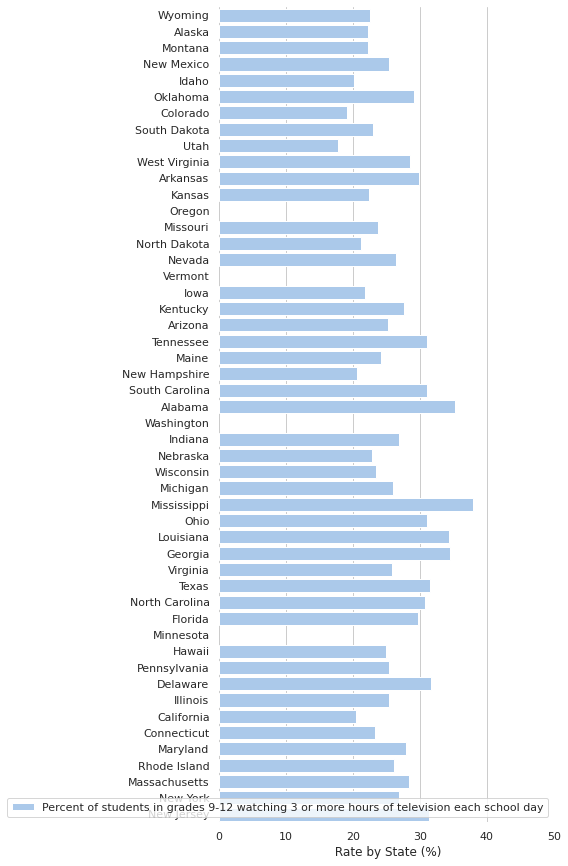

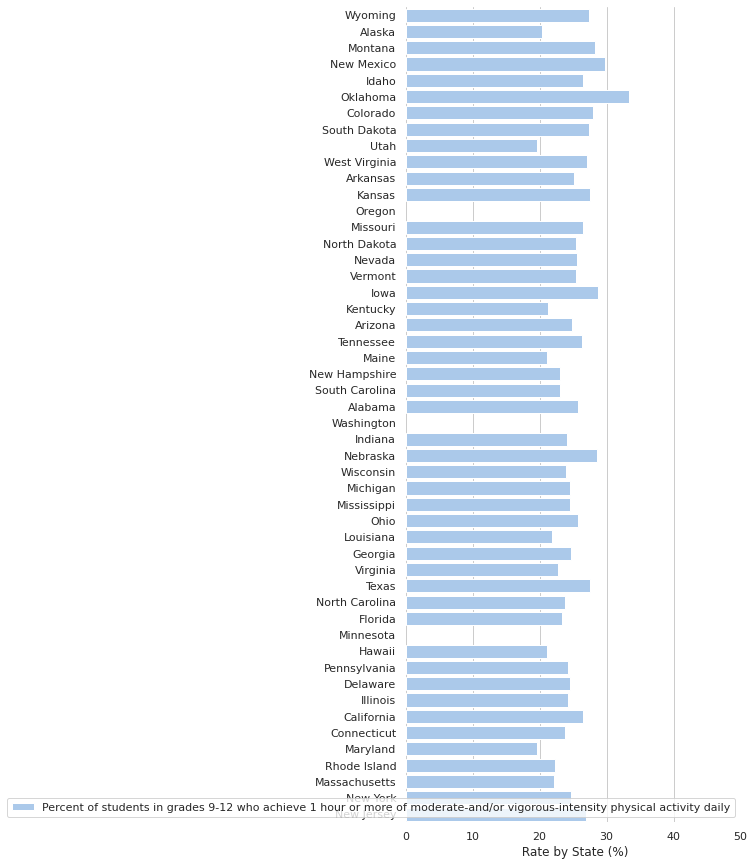

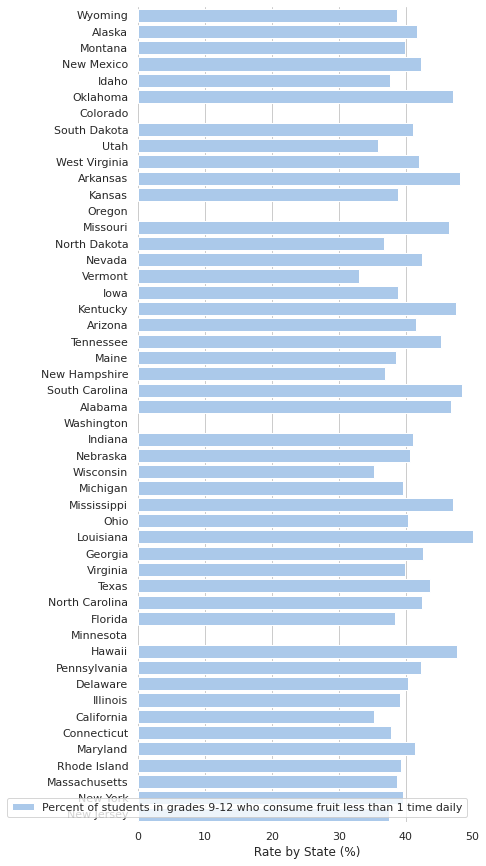

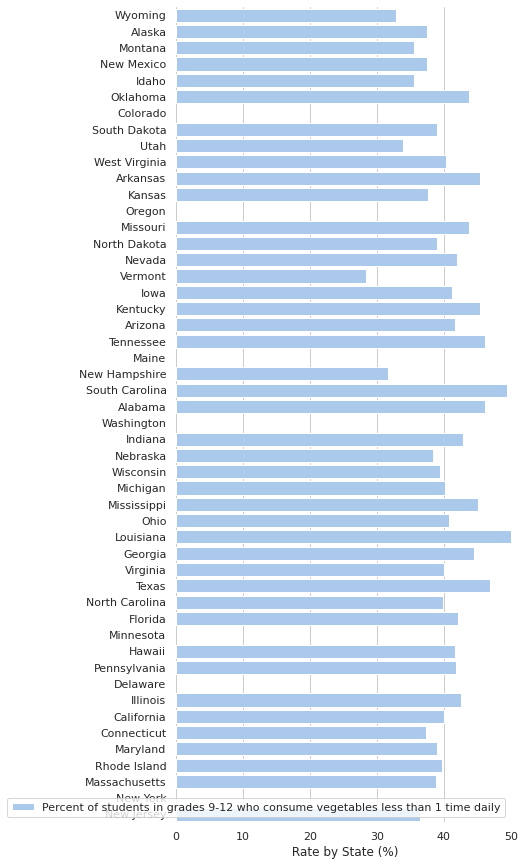

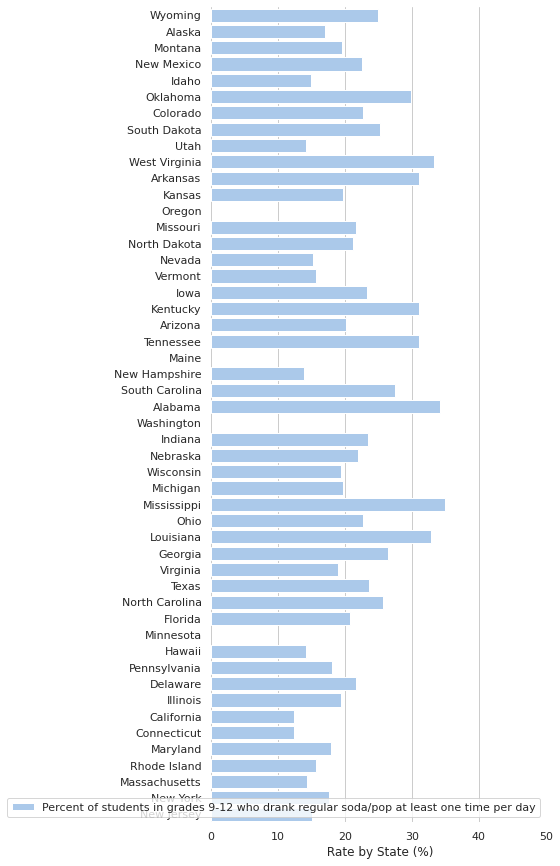

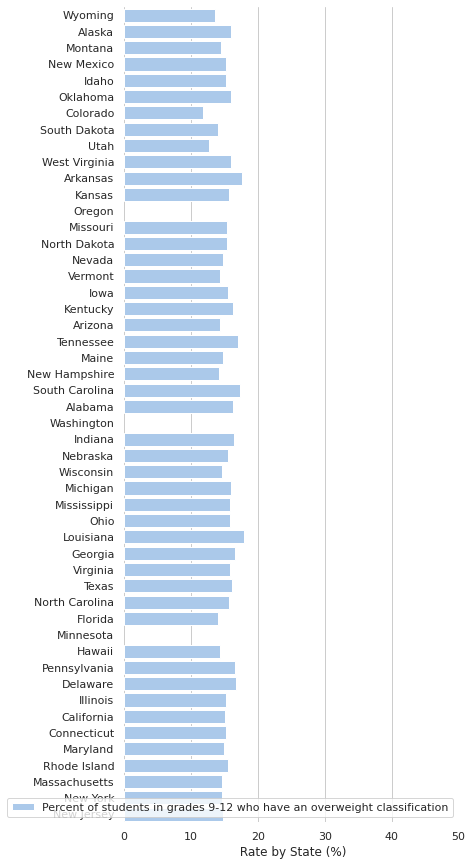

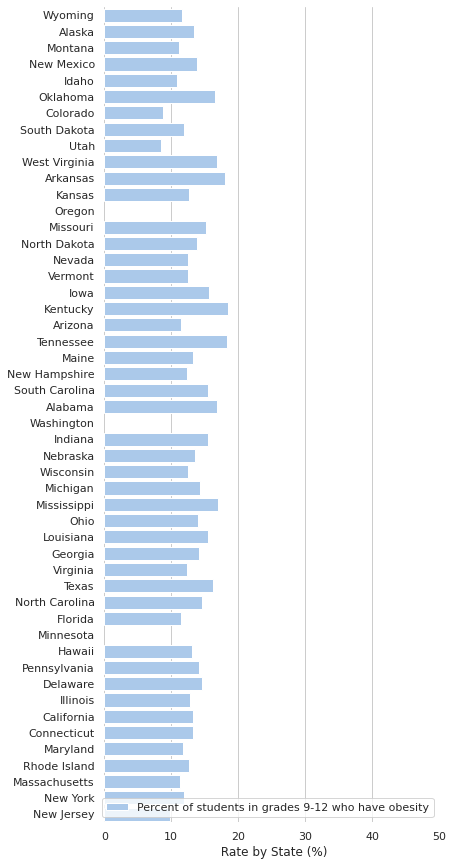

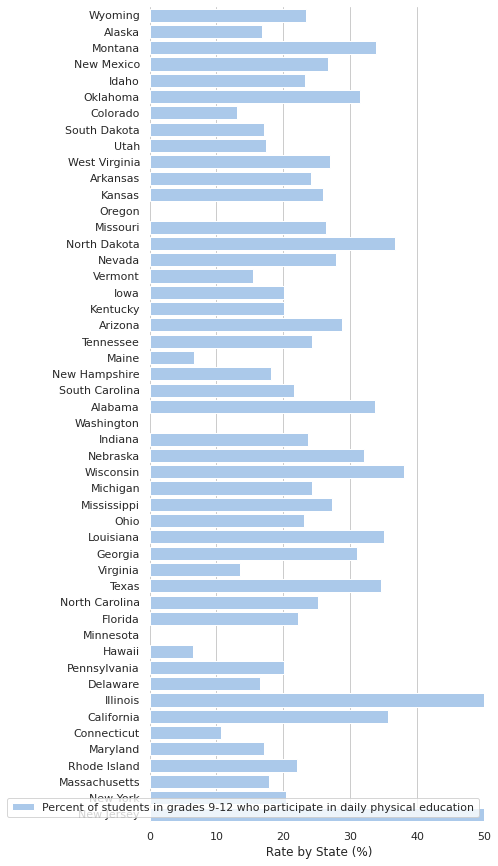

In [132]:
#states are sorted from greatest to least on suicide per capita in 2020. 
#Looking for upward or downard trends in frequency of bars. 

ly_k = ly_ed.groupby(by='Question').mean()
for i in ly_k.index:    
    ly_x = i
    ly_y = quesitonToState(ly_x)
    graphIt(ly_y, ly_x)

In [133]:
ly_mhc_data.columns

Index(['Indicator', 'Group', 'State', 'Subgroup', 'Phase', 'Time Period',
       'Time Period Label', 'Time Period Start Date', 'Time Period End Date',
       'Value', 'LowCI', 'HighCI', 'Confidence Interval', 'Quartile Range',
       'Suppression Flag'],
      dtype='object')

In [134]:
ly_health = ly_mhc_data.iloc[:,[0,1,2,3,4,6,7, 9]]
ly_health.head()

,Indicator,Group,State,Subgroup,Phase,Time Period Label,Time Period Start Date,Value
0,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,2,"Aug 19 - Aug 31, 2020",8/19/2020,19.4
1,Took Prescription Medication for Mental Health...,By Age,United States,18 - 29 years,2,"Aug 19 - Aug 31, 2020",8/19/2020,18.7
2,Took Prescription Medication for Mental Health...,By Age,United States,30 - 39 years,2,"Aug 19 - Aug 31, 2020",8/19/2020,18.3
3,Took Prescription Medication for Mental Health...,By Age,United States,40 - 49 years,2,"Aug 19 - Aug 31, 2020",8/19/2020,20.4
4,Took Prescription Medication for Mental Health...,By Age,United States,50 - 59 years,2,"Aug 19 - Aug 31, 2020",8/19/2020,21.2


In [135]:
ly_health.Group.unique()

array(['National Estimate', 'By Age', 'By Sex',
       'By Presence of Symptoms of Anxiety/Depression',
       'By Race/Hispanic ethnicity', 'By Education', 'By State',
       'By Disability status', 'By Sexual orientation',
       'By Gender identity'], dtype=object)

In [136]:
ly_health['Time Period Label'].unique()

array(['Aug 19 - Aug 31, 2020', 'Sep 2 - Sep 14, 2020',
       'Sep 16 - Sep 28, 2020', 'Sep 30 - Oct 12, 2020',
       'Dec 22, 2020 - Jan 5, 2021', 'Oct 14 - Oct 26, 2020',
       'Mar 30 - Apr 13, 2021', 'Oct 28 - Nov 9, 2020',
       'Nov 11 - Nov 23, 2020', 'Nov 25 - Dec 7, 2020',
       'Dec 9 - Dec 21, 2020', 'Jan 6 - Jan 18, 2021',
       'Jan 20 - Feb 1, 2021', 'Jul 6 - Jul 20, 2021',
       'Feb 3 - Feb 15, 2021', 'Feb 17 - Mar 1, 2021',
       'Mar 17 - Mar 29, 2021', 'Mar 3 - Mar 15, 2021',
       'Apr 14 - Apr 26, 2021', 'Apr 28 - May 10, 2021',
       'May 12 - May 24, 2021', 'May 26 - Jun 7, 2021',
       'Feb 23 - Mar 1, 2022', 'Jun 9 - Jun 21, 2021',
       'Jun 23 - Jul 5, 2021', 'Jul 21 - Aug 2, 2021',
       'Aug 4 - Aug 16, 2021', 'Aug 18 - Aug 30, 2021',
       'Sep 1 - Sep 13, 2021', 'Sep 15 - Sep 27, 2021',
       'Sep 29 - Oct 11, 2021', 'Oct 12 - Nov 30, 2021',
       'Dec 1 - Dec 13, 2021', 'Dec 29, 2021 - Jan 10, 2022',
       'Jan 26 - Feb 7, 2022', 'Mar 2 

In [137]:
ly_health.Group.unique()

array(['National Estimate', 'By Age', 'By Sex',
       'By Presence of Symptoms of Anxiety/Depression',
       'By Race/Hispanic ethnicity', 'By Education', 'By State',
       'By Disability status', 'By Sexual orientation',
       'By Gender identity'], dtype=object)

In [138]:
#Thanks Jaipaul!
ly_health['Year'] = pd.DatetimeIndex(ly_health['Time Period Start Date']).year
ly_health.head()

,Indicator,Group,State,Subgroup,Phase,Time Period Label,Time Period Start Date,Value,Year
0,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,2,"Aug 19 - Aug 31, 2020",8/19/2020,19.4,2020
1,Took Prescription Medication for Mental Health...,By Age,United States,18 - 29 years,2,"Aug 19 - Aug 31, 2020",8/19/2020,18.7,2020
2,Took Prescription Medication for Mental Health...,By Age,United States,30 - 39 years,2,"Aug 19 - Aug 31, 2020",8/19/2020,18.3,2020
3,Took Prescription Medication for Mental Health...,By Age,United States,40 - 49 years,2,"Aug 19 - Aug 31, 2020",8/19/2020,20.4,2020
4,Took Prescription Medication for Mental Health...,By Age,United States,50 - 59 years,2,"Aug 19 - Aug 31, 2020",8/19/2020,21.2,2020


In [139]:
ly_education = ly_health.loc[(ly_health['Group'] == 'By Education') & (ly_health['Phase'] != '-1')]
ly_education.head()


,Indicator,Group,State,Subgroup,Phase,Time Period Label,Time Period Start Date,Value,Year
17,Took Prescription Medication for Mental Health...,By Education,United States,Less than a high school diploma,2,"Aug 19 - Aug 31, 2020",8/19/2020,17.4,2020
18,Took Prescription Medication for Mental Health...,By Education,United States,High school diploma or GED,2,"Aug 19 - Aug 31, 2020",8/19/2020,18.1,2020
19,Took Prescription Medication for Mental Health...,By Education,United States,Some college/Associate's degree,2,"Aug 19 - Aug 31, 2020",8/19/2020,21.0,2020
20,Took Prescription Medication for Mental Health...,By Education,United States,Bachelor's degree or higher,2,"Aug 19 - Aug 31, 2020",8/19/2020,19.4,2020
89,"Received Counseling or Therapy, Last 4 Weeks",By Education,United States,Less than a high school diploma,2,"Aug 19 - Aug 31, 2020",8/19/2020,7.1,2020


In [140]:
ly_edplot = ly_education.groupby(by=['Indicator','Subgroup']).mean()

In [141]:
ly_edplot

Value  \
Indicator                                          Subgroup                                     
Needed Counseling or Therapy But Did Not Get It... Bachelor's degree or higher      10.609091   
                                                   High school diploma or GED        8.748485   
                                                   Less than a high school diploma  10.545455   
                                                   Some college/Associate's degree  13.472727   
Received Counseling or Therapy, Last 4 Weeks       Bachelor's degree or higher      12.596970   
                                                   High school diploma or GED        6.921212   
                                                   Less than a high school diploma   8.439394   
                                                   Some college/Associate's degree  10.903030   
Took Prescription Medication for Mental Health ... Bachelor's degree or higher      26.069697   
                                                   High school diploma or GED       21.927273   
                                                   Less than a high school diploma  21.206061   
                                                   Some college/Associate's degree  27.154545   
Took Prescription Medication for Mental Health,... Bachelor's degree or higher      20.806061   
                                                   High school diploma or GED       20.033333   
                                                   Less than a high school diploma  19.109091   
                                                   Some college/Associate's degree  23.787879   

                                                                                           Year  
Indicator                                          Subgroup                                      
Needed Counseling or Therapy But Did Not Get It... Bachelor's degree or higher      2020.848485  
                                                   High school diploma or GED       2020.848485  
                                                   Less than a high school diploma  2020.848485  
                                                   Some college/Associate's degree  2020.848485  
Received Counseling or Therapy, Last 4 Weeks       Bachelor's degree or higher      2020.848485  
                                                   High school diploma or GED       2020.848485  
                                                   Less than a high school diploma  2020.848485  
                                                   Some college/Associate's degree  2020.848485  
Took Prescription Medication for Mental Health ... Bachelor's degree or higher      2020.848485  
                                                   High school diploma or GED       2020.848485  
                                                   Less than a high school diploma  2020.848485  
                                                   Some college/Associate's degree  2020.848485  
Took Prescription Medication for Mental Health,... Bachelor's degree or higher      2020.848485  
                                                   High school diploma or GED       2020.848485  
                                                   Less than a high school diploma  2020.848485  
                                                   Some college/Associate's degree  2020.848485

In [142]:
ly_education.Year.unique()

array([2020, 2021, 2022])

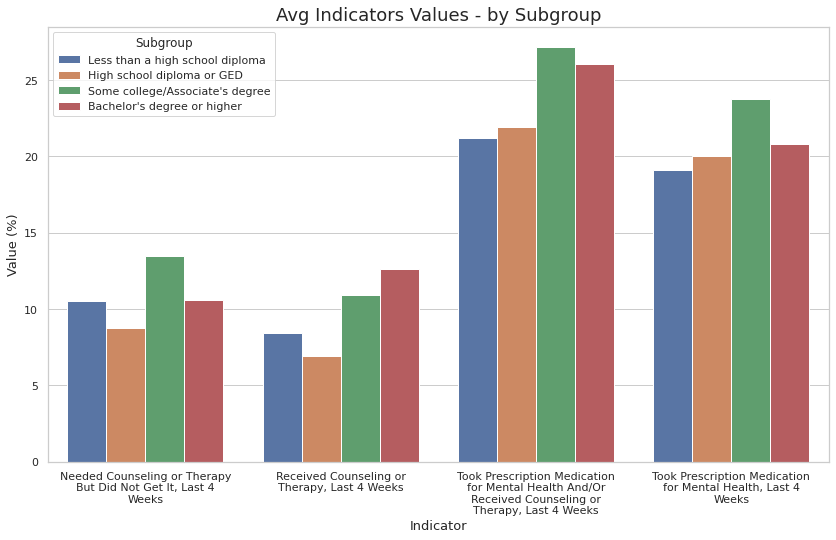

In [143]:

def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

fig, ax = plt.subplots(figsize = ( 14 , 8 ))

# grouped by indicator and year
barplot_data = ly_education.groupby(['Indicator','Subgroup']).agg({'Value':['mean','count']})
barplot_data.columns = ['value_mean','value_count']
barplot_data = barplot_data.reset_index()

graph = sns.barplot(data = barplot_data
             , ax = ax
             , x = 'Indicator'
             , y = 'value_mean'
             , hue = 'Subgroup'
            , hue_order = ['Less than a high school diploma',
 'High school diploma or GED',
 "Some college/Associate's degree",
 "Bachelor's degree or higher"]
            )

ax.tick_params(axis='x', rotation=0)

# Set label for x-axis
ax.set_xlabel( "Indicator" , size = 13 )
  
# Set label for y-axis
ax.set_ylabel( "Value (%)" , size = 13 )
  
# Set title for plot
ax.set_title( "Avg Indicators Values - by Subgroup" , size = 18 )

wrap_labels(ax, 30)


In [144]:
ly_2020ed = ly_education.loc[ly_education.Year == 2020]
ly_2020ed.head()

,Indicator,Group,State,Subgroup,Phase,Time Period Label,Time Period Start Date,Value,Year
17,Took Prescription Medication for Mental Health...,By Education,United States,Less than a high school diploma,2,"Aug 19 - Aug 31, 2020",8/19/2020,17.4,2020
18,Took Prescription Medication for Mental Health...,By Education,United States,High school diploma or GED,2,"Aug 19 - Aug 31, 2020",8/19/2020,18.1,2020
19,Took Prescription Medication for Mental Health...,By Education,United States,Some college/Associate's degree,2,"Aug 19 - Aug 31, 2020",8/19/2020,21.0,2020
20,Took Prescription Medication for Mental Health...,By Education,United States,Bachelor's degree or higher,2,"Aug 19 - Aug 31, 2020",8/19/2020,19.4,2020
89,"Received Counseling or Therapy, Last 4 Weeks",By Education,United States,Less than a high school diploma,2,"Aug 19 - Aug 31, 2020",8/19/2020,7.1,2020


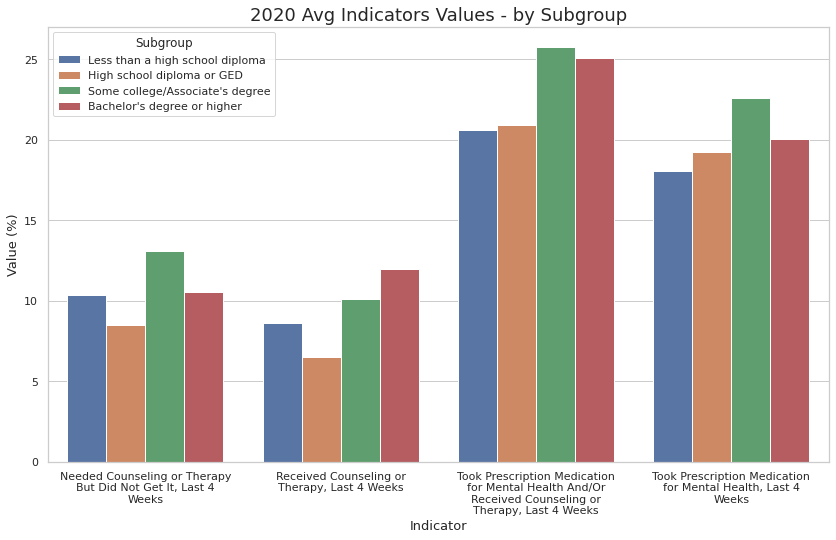

In [145]:

ly_2020ed = ly_education.loc[ly_education.Year == 2020]
ly_2020ed.head()

def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

fig, ax = plt.subplots(figsize = ( 14 , 8 ))

# grouped by indicator and year
barplot_data = ly_2020ed.groupby(['Indicator','Subgroup']).agg({'Value':['mean','count']})
barplot_data.columns = ['value_mean','value_count']
barplot_data = barplot_data.reset_index()

graph = sns.barplot(data = barplot_data
             , ax = ax
             , x = 'Indicator'
             , y = 'value_mean'
             , hue = 'Subgroup'
            , hue_order = ['Less than a high school diploma',
 'High school diploma or GED',
 "Some college/Associate's degree",
 "Bachelor's degree or higher"]
            )

ax.tick_params(axis='x', rotation=0)

# Set label for x-axis
ax.set_xlabel( "Indicator" , size = 13 )
  
# Set label for y-axis
ax.set_ylabel( "Value (%)" , size = 13 )
  
# Set title for plot
ax.set_title( "2020 Avg Indicators Values - by Subgroup" , size = 18 )

wrap_labels(ax, 30)

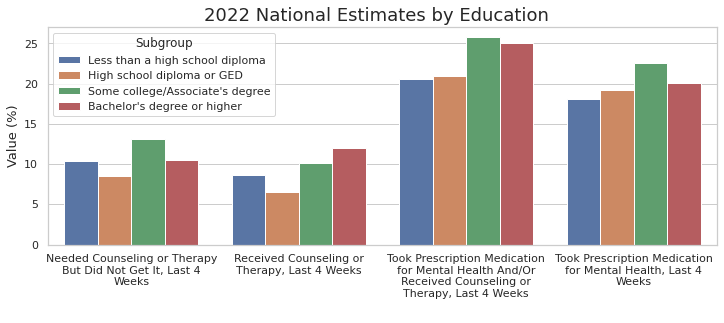

In [146]:
ly_2022ed = ly_education.loc[ly_education.Year == 2022]
ly_2022ed.head()

def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

fig, ax = plt.subplots(figsize = ( 12 , 4 ))

# grouped by indicator and year
barplot_data = ly_2020ed.groupby(['Indicator','Subgroup']).agg({'Value':['mean','count']})
barplot_data.columns = ['value_mean','value_count']
barplot_data = barplot_data.reset_index()

graph = sns.barplot(data = barplot_data
             , ax = ax
             , x = 'Indicator'
             , y = 'value_mean'
             , hue = 'Subgroup'
            , hue_order = ['Less than a high school diploma',
 'High school diploma or GED',
 "Some college/Associate's degree",
 "Bachelor's degree or higher"]
            )

ax.tick_params(axis='x', rotation=0)

# Set label for x-axis
ax.set_xlabel( " " , size = 13 )
  
# Set label for y-axis
ax.set_ylabel( "Value (%)" , size = 13 )
  
# Set title for plot
ax.set_title( "2022 National Estimates by Education  " , size = 18 )

wrap_labels(ax, 30)

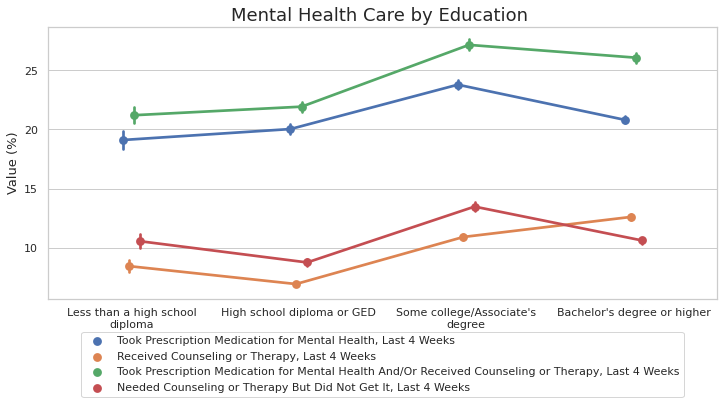

In [147]:
fig, ax = plt.subplots(figsize = ( 12 , 5 ))
sns.pointplot(data = ly_education, x = 'Subgroup', y = 'Value', hue = "Indicator", dodge = True, )
ax.tick_params(axis='x', rotation=0)

# Set label for x-axis
ax.set_xlabel( " " , size = 13 )
  
# Set label for y-axis
ax.set_ylabel( "Value (%)" , size = 13 )

  
# Set title for plot
ax.set_title( "Mental Health Care by Education " , size = 18 )

wrap_labels(ax, 30)

ax.legend(ncol=1, loc="upper center", frameon=True, bbox_to_anchor=(0.5,-.1))



In [148]:
ly_2022ed

,Indicator,Group,State,Subgroup,Phase,Time Period Label,Time Period Start Date,Value,Year
9032,Took Prescription Medication for Mental Health...,By Education,United States,Less than a high school diploma,3.3,"Jan 26 - Feb 7, 2022",1/26/2022,20.1,2022
9033,Took Prescription Medication for Mental Health...,By Education,United States,High school diploma or GED,3.3,"Jan 26 - Feb 7, 2022",1/26/2022,20.9,2022
9034,Took Prescription Medication for Mental Health...,By Education,United States,Some college/Associate's degree,3.3,"Jan 26 - Feb 7, 2022",1/26/2022,24.2,2022
9035,Took Prescription Medication for Mental Health...,By Education,United States,Bachelor's degree or higher,3.3,"Jan 26 - Feb 7, 2022",1/26/2022,21.7,2022
9112,"Received Counseling or Therapy, Last 4 Weeks",By Education,United States,Less than a high school diploma,3.3,"Jan 26 - Feb 7, 2022",1/26/2022,8.0,2022
...,...,...,...,...,...,...,...,...,...
10270,Took Prescription Medication for Mental Health...,By Education,United States,Bachelor's degree or higher,3.4,"Apr 27 - May 9, 2022",4/27/2022,28.4,2022
10347,Needed Counseling or Therapy But Did Not Get I...,By Education,United States,Less than a high school diploma,3.4,"Apr 27 - May 9, 2022",4/27/2022,12.2,2022
10348,Needed Counseling or Therapy But Did Not Get I...,By Education,United States,High school diploma or GED,3.4,"Apr 27 - May 9, 2022",4/27/2022,9.1,2022
10349,Needed Counseling or Therapy But Did Not Get I...,By Education,United States,Some college/Associate's degree,3.4,"Apr 27 - May 9, 2022",4/27/2022,15.1,2022


In [149]:
x = ly_2020ed.groupby(['Indicator','Subgroup']).mean()
y = ly_2022ed.groupby(['Indicator','Subgroup']).mean()

ly_education_comparison = x.merge(right = y,on=['Indicator', 'Subgroup'], how='left')
ly_education_comparison['Mean_Difference'] = ly_education_comparison['Value_y'] - ly_education_comparison['Value_x']

In [150]:
ly_education_comparison

Value_x  \
Indicator                                          Subgroup                                     
Needed Counseling or Therapy But Did Not Get It... Bachelor's degree or higher      10.566667   
                                                   High school diploma or GED        8.500000   
                                                   Less than a high school diploma  10.344444   
                                                   Some college/Associate's degree  13.066667   
Received Counseling or Therapy, Last 4 Weeks       Bachelor's degree or higher      11.966667   
                                                   High school diploma or GED        6.466667   
                                                   Less than a high school diploma   8.600000   
                                                   Some college/Associate's degree  10.111111   
Took Prescription Medication for Mental Health ... Bachelor's degree or higher      25.077778   
                                                   High school diploma or GED       20.933333   
                                                   Less than a high school diploma  20.611111   
                                                   Some college/Associate's degree  25.744444   
Took Prescription Medication for Mental Health,... Bachelor's degree or higher      20.055556   
                                                   High school diploma or GED       19.255556   
                                                   Less than a high school diploma  18.077778   
                                                   Some college/Associate's degree  22.611111   

                                                                                    Year_x  \
Indicator                                          Subgroup                                  
Needed Counseling or Therapy But Did Not Get It... Bachelor's degree or higher      2020.0   
                                                   High school diploma or GED       2020.0   
                                                   Less than a high school diploma  2020.0   
                                                   Some college/Associate's degree  2020.0   
Received Counseling or Therapy, Last 4 Weeks       Bachelor's degree or higher      2020.0   
                                                   High school diploma or GED       2020.0   
                                                   Less than a high school diploma  2020.0   
                                                   Some college/Associate's degree  2020.0   
Took Prescription Medication for Mental Health ... Bachelor's degree or higher      2020.0   
                                                   High school diploma or GED       2020.0   
                                                   Less than a high school diploma  2020.0   
                                                   Some college/Associate's degree  2020.0   
Took Prescription Medication for Mental Health,... Bachelor's degree or higher      2020.0   
                                                   High school diploma or GED       2020.0   
                                                   Less than a high school diploma  2020.0   
                                                   Some college/Associate's degree  2020.0   

                                                                                    Value_y  \
Indicator                                          Subgroup                                   
Needed Counseling or Therapy But Did Not Get It... Bachelor's degree or higher       10.925   
                                                   High school diploma or GED         8.975   
                                                   Less than a high school diploma   11.750   
                                                   Some college/Associate's degree   14.200   
Received Counseling or Therapy, Last 4 Weeks       Bachelor's degree or high

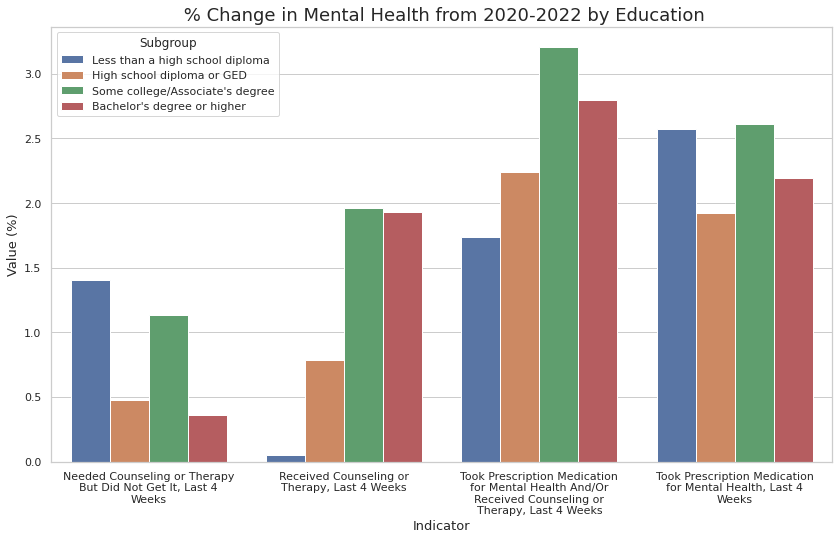

In [151]:
fig, ax = plt.subplots(figsize = ( 14 , 8 ))

ly_education_comparison.reset_index(inplace=True)


sns.barplot(
data = ly_education_comparison, x = 'Indicator', y = 'Mean_Difference', hue = 'Subgroup', hue_order = ['Less than a high school diploma',
 'High school diploma or GED',
 "Some college/Associate's degree",
 "Bachelor's degree or higher"])

ax.tick_params(axis='x', rotation=0)

# Set label for x-axis
ax.set_xlabel( "Indicator" , size = 13 )
  
# Set label for y-axis
ax.set_ylabel( "Value (%)" , size = 13 )
  
# Set title for plot
ax.set_title( " % Change in Mental Health from 2020-2022 by Education" , size = 18 )

wrap_labels(ax, 30)


# Exploring disability status


In [152]:
ly_mhc_data.columns

Index(['Indicator', 'Group', 'State', 'Subgroup', 'Phase', 'Time Period',
       'Time Period Label', 'Time Period Start Date', 'Time Period End Date',
       'Value', 'LowCI', 'HighCI', 'Confidence Interval', 'Quartile Range',
       'Suppression Flag'],
      dtype='object')

In [153]:
ly_disability = ly_mhc_data.iloc[:, [0,1,2,3,5,6,7,8,9]]
ly_disability.head()
ly_disability.Group.unique()

array(['National Estimate', 'By Age', 'By Sex',
       'By Presence of Symptoms of Anxiety/Depression',
       'By Race/Hispanic ethnicity', 'By Education', 'By State',
       'By Disability status', 'By Sexual orientation',
       'By Gender identity'], dtype=object)

In [154]:
ly_symptoms = ly_disability.loc[ly_disability.Group == 'By Presence of Symptoms of Anxiety/Depression']

In [155]:
ly_symptoms.head()

,Indicator,Group,State,Subgroup,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value
10,Took Prescription Medication for Mental Health...,By Presence of Symptoms of Anxiety/Depression,United States,Did not experience symptoms of anxiety/depress...,13,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,11.6
11,Took Prescription Medication for Mental Health...,By Presence of Symptoms of Anxiety/Depression,United States,Experienced symptoms of anxiety/depression in ...,13,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,33.0
82,"Received Counseling or Therapy, Last 4 Weeks",By Presence of Symptoms of Anxiety/Depression,United States,Did not experience symptoms of anxiety/depress...,13,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,4.8
83,"Received Counseling or Therapy, Last 4 Weeks",By Presence of Symptoms of Anxiety/Depression,United States,Experienced symptoms of anxiety/depression in ...,13,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,15.7
154,Took Prescription Medication for Mental Health...,By Presence of Symptoms of Anxiety/Depression,United States,Did not experience symptoms of anxiety/depress...,13,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,13.9


In [156]:
ly_symptoms.groupby(['Indicator','Subgroup']).mean()

Time Period  \
Indicator                                          Subgroup                                                          
Needed Counseling or Therapy But Did Not Get It... Did not experience symptoms of anxiety/depressi...    25.315789   
                                                   Experienced symptoms of anxiety/depression in p...    25.315789   
Received Counseling or Therapy, Last 4 Weeks       Did not experience symptoms of anxiety/depressi...    25.315789   
                                                   Experienced symptoms of anxiety/depression in p...    25.315789   
Took Prescription Medication for Mental Health ... Did not experience symptoms of anxiety/depressi...    25.315789   
                                                   Experienced symptoms of anxiety/depression in p...    25.315789   
Took Prescription Medication for Mental Health,... Did not experience symptoms of anxiety/depressi...    25.315789   
                                                   Experienced symptoms of anxiety/depression in p...    25.315789   

                                                                                                           Value  
Indicator                                          Subgroup                                                       
Needed Counseling or Therapy But Did Not Get It... Did not experience symptoms of anxiety/depressi...   3.418182  
                                                   Experienced symptoms of anxiety/depression in p...  25.287879  
Received Counseling or Therapy, Last 4 Weeks       Did not experience symptoms of anxiety/depressi...   5.854545  
                                                   Experienced symptoms of anxiety/depression in p...  18.312121  
Took Prescription Medication for Mental Health ... Did not experience symptoms of anxiety/depressi...  16.342424  
                                                   Experienced symptoms of anxiety/depression in p...  40.978788  
Took Prescription Medication for Mental Health,... Did not experience symptoms of anxiety/depressi...  13.727273  
                                                   Experienced symptoms of anxiety/depression in p...  35.915152

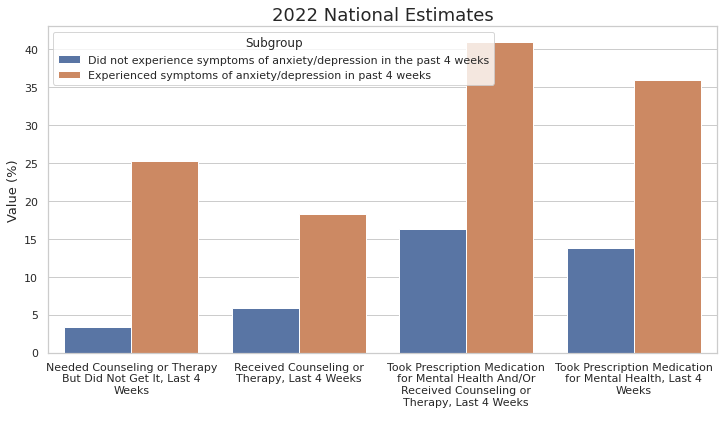

In [157]:
fig, ax = plt.subplots(figsize = ( 12, 6))

# grouped by indicator and year
barplot_data = ly_symptoms.groupby(['Indicator','Subgroup']).agg({'Value':['mean','count']})
barplot_data.columns = ['value_mean','value_count']
barplot_data = barplot_data.reset_index()

graph = sns.barplot(data = barplot_data
             , ax = ax
             , x = 'Indicator'
             , y = 'value_mean'
             , hue = 'Subgroup'
#             , hue_order = ['Less than a high school diploma',
#  'High school diploma or GED',
#  "Some college/Associate's degree",
#  "Bachelor's degree or higher"]
            )

ax.tick_params(axis='x', rotation=0)

# Set label for x-axis
ax.set_xlabel( " " , size = 13 )
  
# Set label for y-axis
ax.set_ylabel( "Value (%)" , size = 13 )
  
# Set title for plot
ax.set_title( "2022 National Estimates" , size = 18 )

wrap_labels(ax, 30)


In [160]:
ly_disability_symptoms = ly_disability.loc[ly_disability.Group == 'By Disability status']

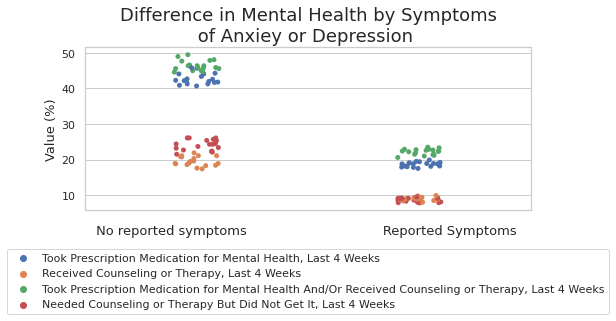

In [163]:
fig, ax = plt.subplots(figsize = ( 8 , 3 ))
sns.stripplot(data = ly_disability_symptoms, x = 'Subgroup', y = 'Value', hue = "Indicator")
ax.tick_params(axis='x', rotation=0)

# Set label for x-axis
ax.set_xlabel( " No reported symptoms                                 Reported Symptoms  " , size = 13 )
  
# Set label for y-axis
ax.set_ylabel( "Value (%)" , size = 13 )

  
# Set title for plot
ax.set_title( "Difference in Mental Health by Symptoms\n of Anxiey or Depression  " , size = 18 )

wrap_labels(ax, 30)

ax.legend(ncol=1, loc="upper center", frameon=True, bbox_to_anchor=(0.5,-.2))

In [164]:
ly_mhc_data.columns
ly_need_help = ly_mhc_data.iloc[:,[0,1,2,3,4,6,7,8,9,]]
ly_need_help['Year'] = pd.to_datetime(ly_need_help['Time Period Start Date'])
ly_need_help['Year'] = pd.DatetimeIndex(ly_need_help['Year']).year

ly_need_help.head()


,Indicator,Group,State,Subgroup,Phase,Time Period Label,Time Period Start Date,Time Period End Date,Value,Year
0,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,2,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,19.4,2020
1,Took Prescription Medication for Mental Health...,By Age,United States,18 - 29 years,2,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,18.7,2020
2,Took Prescription Medication for Mental Health...,By Age,United States,30 - 39 years,2,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,18.3,2020
3,Took Prescription Medication for Mental Health...,By Age,United States,40 - 49 years,2,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,20.4,2020
4,Took Prescription Medication for Mental Health...,By Age,United States,50 - 59 years,2,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,21.2,2020


In [165]:
ly_need_help = ly_need_help.loc[(ly_need_help['Year'] == 2020) & (ly_need_help['State'] != 'United States') & (ly_need_help['State'] != 'District of Columbia') &  (ly_need_help['Indicator']== 'Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks')  ]

In [166]:
ly_need_help.head()

,Indicator,Group,State,Subgroup,Phase,Time Period Label,Time Period Start Date,Time Period End Date,Value,Year
237,Needed Counseling or Therapy But Did Not Get I...,By State,Alabama,Alabama,2,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,8.4,2020
238,Needed Counseling or Therapy But Did Not Get I...,By State,Alaska,Alaska,2,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,8.5,2020
239,Needed Counseling or Therapy But Did Not Get I...,By State,Arizona,Arizona,2,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,9.7,2020
240,Needed Counseling or Therapy But Did Not Get I...,By State,Arkansas,Arkansas,2,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,7.7,2020
241,Needed Counseling or Therapy But Did Not Get I...,By State,California,California,2,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,9.2,2020


In [167]:
ly_2020_rates.head()

,YEAR,STATE,RATE,DEATHS,URL
49,2020,Wyoming,30.5,182,/nchs/pressroom/states/wyoming/wy.htm
1,2020,Alaska,27.5,204,/nchs/pressroom/states/alaska/ak.htm
25,2020,Montana,26.1,300,/nchs/pressroom/states/montana/mt.htm
30,2020,New Mexico,24.2,516,/nchs/pressroom/states/newmexico/nm.htm
11,2020,Idaho,23.2,419,/nchs/pressroom/states/idaho/id.htm


In [168]:
temp = ly_need_help.groupby(by='State').mean()
temp.reset_index(inplace = True)
ly_2020_rates.rename(columns ={'STATE':'State'}, inplace=True)
ly_2020_rates.head()
ly_merged = ly_2020_rates.merge(right = temp, how = 'left', on = 'State')
ly_merged.drop( ['YEAR', 'Year', 'URL', 'DEATHS'] ,axis = 1, inplace=True )
ly_merged = ly_merged.loc[ly_merged.Value >11.3]


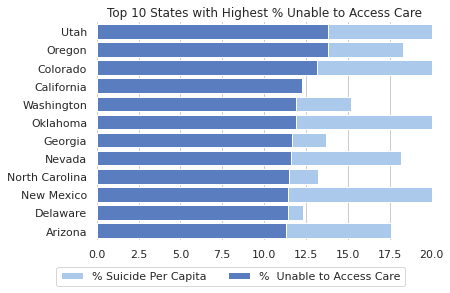

In [169]:

ly_merged.sort_values(by='Value', ascending= False, inplace=True)


sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 4))

# Plot the death rates

sns.set_color_codes("pastel")
sns.barplot(x="RATE", y="State", data=ly_merged,
            label="% Suicide Per Capita", color="b")

#Plot the %rate of needing help but not getting
sns.set_color_codes("muted")
sns.barplot(x="Value", y="State", data=ly_merged,
            label="%  Unable to Access Care", color="b")

# Add a legend and informative axis label
ax.set_title('Top 10 States with Highest % Unable to Access Care')
ax.legend(ncol=2, loc="upper center", frameon=True, bbox_to_anchor=(0.4,-.1))
ax.set(xlim=(0, 20), ylabel="",
        xlabel=" ")

sns.despine(left=True, bottom=True)
